In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\lucio\DataScience\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


# Stocks owned

In [2]:
tickers = ['XOM','T','KO','JPM','BAC','PFE']

In [3]:
for t in tickers:
    """
    This will make a DataFrame for each one of the stocks in the ticker list
    and fill it with each individual data.
    Willbe useful for the later automation.
    """
    nombre_df = str(t)
    globals()[nombre_df] = pd.DataFrame(columns=[nombre_df])
    
    #funcion que quiero automatizar
    globals()[nombre_df] = wb.DataReader(nombre_df,data_source='yahoo', start='2010-1-1')

***Adjusted close***<br/>
Adjusted closing price amends a stock's closing price to accurately reflect that stock's value after accounting for any corporate actions. It is considered to be the true price of that stock and is often used when examining historical returns or performing a detailed analysis of historical returns.

In [4]:
XOM.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,69.260002,68.190002,68.720001,69.150002,27809100.0,48.404034
2010-01-05,69.449997,68.800003,69.190002,69.419998,30174700.0,48.593029
2010-01-06,70.599998,69.339996,69.449997,70.019997,35044700.0,49.013016
2010-01-07,70.059998,69.419998,69.900002,69.800003,27192100.0,48.859024
2010-01-08,69.750000,69.220001,69.690002,69.519997,24891800.0,48.663021


#### Portfolio of adjusted close

A dataframe with the selected stocks are made, importing the adjusted close

In [5]:
my_pfolio = pd.DataFrame()
for t in tickers:
    """
    This will make a dataframe with the "Adj Close" of each of our stocks
    """
    my_pfolio[t] = wb.DataReader(t, data_source='yahoo', start='2010-1-1')['Adj Close']

my_pfolio.head()

,XOM,T,KO,JPM,BAC,PFE
Date,,,,,,
2010-01-04,48.404034,16.015694,19.292267,32.941040,14.010186,12.837371
2010-01-05,48.593029,15.937237,19.058893,33.579121,14.465584,12.654274
2010-01-06,49.013016,15.704037,19.052124,33.763607,14.635240,12.613586
2010-01-07,48.859024,15.527716,19.004770,34.432430,15.117428,12.566119
2010-01-08,48.663021,15.413966,18.653023,34.347870,14.983487,12.667833


# Portfolio Return

***Simple Return***
\begin{equation*}
 r_t = \frac{P_t}{ P_{t-1}}  -1
\end{equation*}

***Simple return*** is better for ***comparing stocks weigthed differently at some point it time***, also to calculate the portfolio return in a specific time. The addition of the weighted simple returns of stocks in a portfolio at a specific time will give the porfolio return.

***Log Return***
\begin{equation*}
 r_t = ln(P_t) - ln(P_{t-1}) = ln(\frac{P_t}{P_{t-1}})
\end{equation*}

***Log Return*** is better to compare the ***same stock over time***, as returns at different times can be added and it will give the total. Also this applies to the total porfolio as returns of different periods can be added. The disadvantage is that the addition of the weighted log returns of stocks in a portfolio at a specific time won't give the real porfolio return. For doing this, the addition of weighted simple returns is the correct way to do it

https://www.youtube.com/watch?v=PtoUlt3V0CI

#### Simple Return

In [6]:
returns = my_pfolio.pct_change(1)
returns.dropna(inplace=True)
returns.head()

,XOM,T,KO,JPM,BAC,PFE
Date,,,,,,
2010-01-05,0.003905,-0.004899,-0.012097,0.019370,0.032505,-0.014263
2010-01-06,0.008643,-0.014632,-0.000355,0.005494,0.011728,-0.003215
2010-01-07,-0.003142,-0.011228,-0.002485,0.019809,0.032947,-0.003763
2010-01-08,-0.004012,-0.007326,-0.018508,-0.002456,-0.008860,0.008094
2010-01-11,0.011220,-0.004798,0.020308,-0.003357,0.008939,0.008030


#### Porfolio weights

Portfolio weights provide information about portfolio composition. The weight of an investment in a porfolio is the percent of that investment(Stock "X") in the total porfolio(sum of all stocks)

\begin{equation*}
 Weight = \frac{Stock's value}{ Total porfolio value}  * 100
\end{equation*}

In [7]:
"""
Just put the # of shares you own
"""
owned1 = {'XOM':19,'T':7,'KO':4,'JPM':2,'BAC':5,'PFE':5}

In [8]:
wg1 = {'XOM':0.4911,'T':0.1217,'KO':0.1049,'JPM':0.1071,'BAC':0.0677,'PFE':0.1074}

In [9]:
my_pfolio.tail()

,XOM,T,KO,JPM,BAC,PFE
Date,,,,,,
2020-05-19,43.939999,28.959999,44.540001,88.669998,22.209999,37.680000
2020-05-20,45.369999,29.590000,45.889999,91.330002,22.910000,37.630001
2020-05-21,44.560001,29.770000,45.169998,90.169998,22.900000,37.259998
2020-05-22,44.599998,29.879999,45.029999,89.470001,22.660000,37.500000
2020-05-26,45.910000,30.820000,46.090000,95.820000,24.280001,37.490002


#### Last quoted:

It's the last price available for each stock

In [10]:
my_pfolio.iloc[-1]

XOM    45.910000
T      30.820000
KO     46.090000
JPM    95.820000
BAC    24.280001
PFE    37.490002
Name: 2020-05-26 00:00:00, dtype: float64

#### Money in each stock

We just mutiply the amount of stocks we have for their last quoted price. Also we calculate our total porfolio

In [11]:
total_porfolio=0
"""
Multiplies the quantity of stock owned by the last quote available for that 
stock in the portfolio.
This will "return" the amount of money we invested in each stock.
Also calculates the total portfolio value.
"""
for t in owned1:
    stock = round(owned1[t] * my_pfolio[t].iloc[-1],4)
    total_porfolio = total_porfolio + owned1[t] * my_pfolio[t].iloc[-1]
    
    print (t,'${}'.format(stock))
    
print('Total porfolio: ${}'.format(total_porfolio))

XOM $872.29
T $215.74
KO $184.36
JPM $191.64
BAC $121.4
PFE $187.45
Total porfolio: $1772.8800067901611


Weights

In [12]:
weights_d_1 = {}
"""
Calculates the weight of each stock of our portfolio by calculating the
money invested in each stock, and dividing it by the total porfolio value.
"""
for t in tickers:
    weights_d_1[t] = owned1[t] * my_pfolio[t].iloc[-1] / total_porfolio

    
weights_d_1

{'XOM': 0.49201863282339714,
 'T': 0.12168900153280628,
 'KO': 0.10398898961252288,
 'JPM': 0.1080953018002707,
 'BAC': 0.06847615347246482,
 'PFE': 0.1057319207585382}

#### Weights, dictionaty to list

Automation of the dictionary to a list, it will make the calculations easier

In [13]:
weights_l_1 = []
for t in weights_d_1:
    """
    Put the weights of the dictionary in a list, in the same "order" as
    the dictionary.
    This will make things easier for automation, as it is easier to fill
    a dictionary, but simplier to work with a list.
    """
    weights_l_1.append(weights_d_1[t])

weights_l_1

[0.49201863282339714,
 0.12168900153280628,
 0.10398898961252288,
 0.1080953018002707,
 0.06847615347246482,
 0.1057319207585382]

#### Annual returns: returns * trading days

The annual return is the return that an investment provides over a period of time, expressed as a time-weighted annual percentage.
The number of trading days in a year is 252.

In [14]:
returns.tail()

,XOM,T,KO,JPM,BAC,PFE
Date,,,,,,
2020-05-19,-0.030878,-0.016638,-0.009562,-0.019679,-0.031400,-0.010244
2020-05-20,0.032544,0.021754,0.030310,0.029999,0.031517,-0.001327
2020-05-21,-0.017853,0.006083,-0.015690,-0.012701,-0.000437,-0.009833
2020-05-22,0.000898,0.003695,-0.003099,-0.007763,-0.010480,0.006441
2020-05-26,0.029372,0.031459,0.023540,0.070973,0.071492,-0.000267


Annual return mean

In [15]:
annual_returns = returns.mean() * 252
annual_returns

XOM    0.019334
T      0.080724
KO     0.098009
JPM    0.142152
BAC    0.114506
PFE    0.122000
dtype: float64

#### Total returns: annual returns* weights

Dot product of arrays



\begin{equation*}
A=<{a_x},{a_y}...{a_i}> B=<{b_x},{b_y}...{b_i}>
\end{equation*}

\begin{equation*}
AB = {a_x}{b_x}+{a_y}{b_y}+...{a_i}{b_i} = \sum_{i=1}^n {a_i}{b_i}
\end{equation*}

In our case it would be:

\begin{equation*}
Weights=<{Weight Stock_a},{Weight Stock_b}...{Weight Stock_i}>
\end{equation*}

\begin{equation*}
Annual rerturns=<{Ann Return Stock_a},{Ann Return Stock_b}...{Ann Return Stock_i}>
\end{equation*}

\begin{equation*}
Total Portfolio Return = Weights * Annual Returns = \sum_{i=1}^n {Weight Stock_i}{Annual Return Stock_i}
\end{equation*}

In [16]:
np.dot(annual_returns, weights_l_1)

0.06563374727945395

In [489]:
pfolio_r_1 = np.dot(annual_returns, weights_l_1)

print('Total return portfolio 1{} %'.format(round(pfolio_r_1*100,2)) )

Total return portfolio 16.56 %


# Comparing with other possible portfolio

In [18]:
owned1

{'XOM': 19, 'T': 7, 'KO': 4, 'JPM': 2, 'BAC': 5, 'PFE': 5}

In [19]:
weights_d_1

{'XOM': 0.49201863282339714,
 'T': 0.12168900153280628,
 'KO': 0.10398898961252288,
 'JPM': 0.1080953018002707,
 'BAC': 0.06847615347246482,
 'PFE': 0.1057319207585382}

In [20]:
"""
Just put the # of shares you own
"""
owned2 = {'XOM':10,'T':10,'KO':10,'JPM':10,'BAC':10,'PFE':10}
owned2

{'XOM': 10, 'T': 10, 'KO': 10, 'JPM': 10, 'BAC': 10, 'PFE': 10}

In [21]:
weights_d_2 = {}
"""
Calculates the weight of each stock of our portfolio by calculating the
money invested in each stock, and dividing it by the total porfolio value.
"""
for t in tickers:
    weights_d_2[t] = owned2[t] * my_pfolio[t].iloc[-1] / total_porfolio
#     weights[t] = 0
#     weights[t] = owned1[t] * my_pfolio[t].iloc[-1]
    
# weights_d_2

In [22]:
weights_l_2 = []
for t in weights_d_2:
    """
    Put the weights of the dictionary in a list, in the same "order" as
    the dictionary.
    This will make things easier for automation, as it is easier to fill
    a dictionary, but simplier to work with a list.
    """
    weights_l_2.append(weights_d_2[t])
weights_d_2

{'XOM': 0.258957175170209,
 'T': 0.17384143076115183,
 'KO': 0.2599724740313072,
 'JPM': 0.5404765090013535,
 'BAC': 0.13695230694492963,
 'PFE': 0.2114638415170764}

In [23]:
# Right now it is not necessary, but I might add something in the future

In [24]:
annual_returns_2 = returns.mean() * 252

#### Total returns: annual returns* weights

In [27]:
np.dot(annual_returns_2, weights_l_2)

In [488]:
pfolio_r_2 = np.dot(annual_returns_2, weights_l_2)

print('{} %'.format(round(pfolio_r_2*100,2)) )

16.28 %


We compare both porfolios

In [29]:
print("Return Portfolio 1: {}% \nReturn Portfolio 2: {}% \n".format(round(pfolio_r_1*100,2),round(pfolio_r_2*100,2)))

if pfolio_r_1 > pfolio_r_2:
    print('Return in Porfolio 1 is better than Portfolio 2 by {}%'.format(round((pfolio_r_1 - pfolio_r_2)*100,2)))

elif pfolio_r_1 < pfolio_r_2:
    print('Return in Porfolio 2 is better than Portfolio 1 by {}%'.format(round((-pfolio_r_1 + pfolio_r_2)*100,2)))
else:
    print("No difference")

Return Portfolio 1: 6.56% 
Return Portfolio 2: 16.28% 

Return in Porfolio 2 is better than Portfolio 1 by 9.72%


#### Normalization of porfolio

The normalized value for each bar(point in this case) after the base date/time is the percent of the base price expressed as a whole number. (i.e. 100 times actual price divided by actual base price) This indicator shows the percentage move in price relative to some fixed starting point.

We do this in order to compare the variation of different stocks. If we plot each stock's price some "movements" can be seen as negligible because of the difference in stock prices.

In [30]:
my_pfolio.iloc[-1] / my_pfolio.iloc[0]

XOM    0.948475
T      1.924362
KO     2.389040
JPM    2.908833
BAC    1.733025
PFE    2.920380
dtype: float64

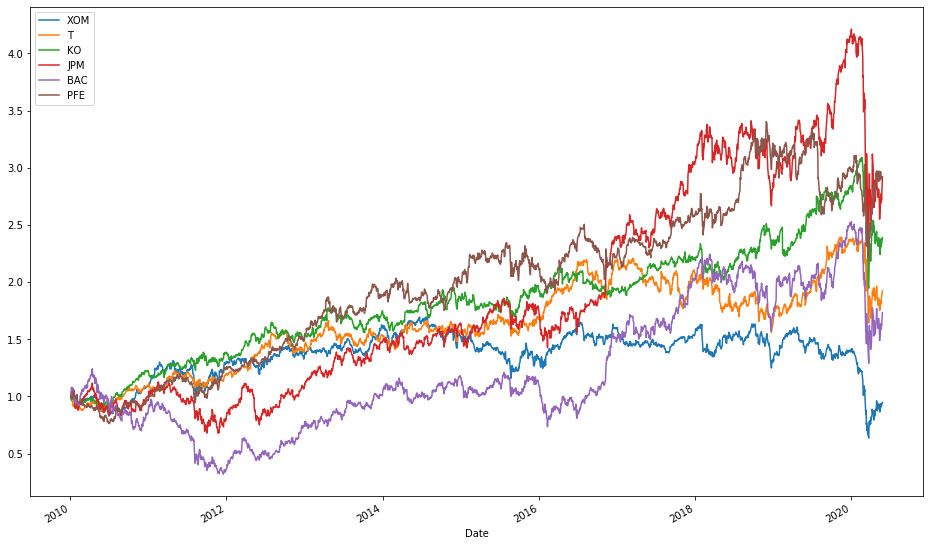

In [31]:
(my_pfolio / my_pfolio.iloc[0]).plot(figsize=(16,10))
plt.show()

In [32]:
my_pfolio_log_return = np.log(my_pfolio / my_pfolio.shift(1))
my_pfolio_log_return.dropna(inplace=True)
my_pfolio_log_return.tail()

,XOM,T,KO,JPM,BAC,PFE
Date,,,,,,
2020-05-19,-0.031365,-0.016778,-0.009608,-0.019876,-0.031904,-0.010297
2020-05-20,0.032026,0.021521,0.029860,0.029558,0.031031,-0.001328
2020-05-21,-0.018014,0.006065,-0.015814,-0.012783,-0.000437,-0.009881
2020-05-22,0.000897,0.003688,-0.003104,-0.007793,-0.010536,0.006421
2020-05-26,0.028949,0.030974,0.023267,0.068568,0.069052,-0.000267


In [33]:
# for t in my_pfolio_log_return:
    
#     daily_return_mean = []
#     dr = daily_return_mean
#     annualized_return_mean = []
#     anr = annualized_return_mean
    
#     daily_std = []
#     ds = daily_std
#     annualized_std = []
#     ans = annualized_std
    
#     #returns -annual
#     daily_return_mean[t] = my_pfolio_log_return[t].mean()
#     annualized_return_mean[t] = my_pfolio_log_return[t].mean() * 252
    
#     #std - anual
#     daily_std[t] = my_pfolio_log_return[t].std()
#     annualized_std[t] = my_pfolio_log_return[t].std() * 252**0.5
    
#     print('{} daily return: {}, annualized return: {}, daily std: {}, annualized std: {}'.format(dr[t],anr[t],ds[t],ans[t]))

# Covariance and Correlation

## Covariance
***Covariance*** is a measure of how ***two assets move together***. It is the expected value of the product of the deviations of the two random variables from their respective expected values. A common symbol for the covariance between random variables X and Y is Cov(X,Y).

\begin{equation*}
Cov(R_i,R_j) = E({[R_i − E(R_i)][R_j − E(R_j)]})
\end{equation*}



The following are properties of the ***covariance***:<br/> 
- Is a general representation of the same concept as the variance. That is, the variance measures how a random variable moves with itself, and ***the covariance measures how one random variable moves with another random variable.*** 
- The covariance of Ra with itself is equal to the variance of Ra; that is, Cov(Ra,Ra) = Var(Ra). 
- The covariance may range from negative infinity to positive infinity.


To aid in the interpretation of covariance, consider the returns of a stock and of a put option on the stock. These two returns will have a negative covariance because they move in opposite directions. The returns of two automotive stocks would likely have a positive covariance, and the returns of a stock and a riskless asset would have a zero covariance because the riskless asset’s returns never move, regardless of movements in the stock’s return. While the formula for covariance given previously is correct, the method of computing the covariance of returns from a joint probability model uses a probability weighted average of the products of the random variable’s deviations from their means for each possible outcome. 

(CFA Quantitative Methods)

\begin{equation*}
Cov_{1,2} = \frac{\sum_{t=1}^n (  {[R_{t,1}−\bar{R_1}][R_{t,2}−\bar{R_2}]})}{n-1}
\end{equation*}

where: 
- Rt,1 = return on Asset 1 in period t 
- Rt,2 = return on Asset 2 in period t 
- R1 = mean return on Asset 1 
- R2 = mean return on Asset 2 
- n = number of periods 

In practice, the covariance is difficult to interpret. This is mostly because it can take on extremely large values, ranging from negative to positive infinity, and, like the variance, these values are expressed in terms of square units.

## Correlation

To make the ***covariance*** of two random variables easier to interpret, it may be divided by the product of the random variables’ standard deviations. The resulting value is called the ***correlation coefficient***, or simply, correlation. The relationship between covariances, standard deviations, and correlations can be seen in the 
following expression for the correlation of the returns for asset i and j:

\begin{equation*}
Corr(R_i,R_j) = \frac{Cov(R_i R_j)} {σ(Ri)σ(Rj)}
\end{equation*}


which implies the following:

\begin{equation*}
Cov(R_i,R_j) = Corr(R_i,R_j) σ(R_i) σ(R_j) 
\end{equation*}

The correlation between two random return variables may also be expressed as ρ(Ri,Rj), or ρi,j. Correlation can be forward-looking if it uses covariance from a probability model, or backward-looking if it uses sample covariance from historical data.

Properties of correlation of two random variables Ri and Rj are summarized here:
- Correlation measures the strength of the linear relationship between two random variables.
- Correlation has no units. The correlation ranges from –1 to +1. That is, –1 ≤ Corr(Ri, Rj) ≤ +1.
- If Corr(Ri, Rj) = 1.0, the random variables have perfect positive correlation. This means that a movement in one random variable results in a proportional positive movement in the other relative to its mean.
- If Corr(Ri, Rj) = –1.0, the random variables have perfect negative correlation. This means that a movement in one random variable results in an exact opposite proportional movement in the other relative to its mean. 
- If Corr(Ri, Rj) = 0, there is no linear relationship between the variables, indicating that prediction of Ri cannot be made on the basis of Rj using linear methods.

To get the covariance and correlation of the porfolio, first we need the log returns of each of the portfolio stock.

In the diagonal of the covariance matrix, variance of each stock

In [34]:
my_pfolio.tail()

,XOM,T,KO,JPM,BAC,PFE
Date,,,,,,
2020-05-19,43.939999,28.959999,44.540001,88.669998,22.209999,37.680000
2020-05-20,45.369999,29.590000,45.889999,91.330002,22.910000,37.630001
2020-05-21,44.560001,29.770000,45.169998,90.169998,22.900000,37.259998
2020-05-22,44.599998,29.879999,45.029999,89.470001,22.660000,37.500000
2020-05-26,45.910000,30.820000,46.090000,95.820000,24.280001,37.490002


In [35]:
my_portfolio_log_ret = np.log(my_pfolio/my_pfolio.shift(1))
my_portfolio_log_ret.dropna(inplace=True)
my_portfolio_log_ret.tail()

,XOM,T,KO,JPM,BAC,PFE
Date,,,,,,
2020-05-19,-0.031365,-0.016778,-0.009608,-0.019876,-0.031904,-0.010297
2020-05-20,0.032026,0.021521,0.029860,0.029558,0.031031,-0.001328
2020-05-21,-0.018014,0.006065,-0.015814,-0.012783,-0.000437,-0.009881
2020-05-22,0.000897,0.003688,-0.003104,-0.007793,-0.010536,0.006421
2020-05-26,0.028949,0.030974,0.023267,0.068568,0.069052,-0.000267


In [36]:
my_portfolio_log_ret.describe()

,XOM,T,KO,JPM,BAC,PFE
count,2615.000000,2615.000000,2615.000000,2615.000000,2615.000000,2615.000000
mean,-0.000020,0.000250,0.000333,0.000408,0.000210,0.000410
std,0.013987,0.012061,0.010875,0.017910,0.022288,0.012497
min,-0.130391,-0.096963,-0.101728,-0.162106,-0.227129,-0.080501
25%,-0.006305,-0.005363,-0.004510,-0.007458,-0.009948,-0.005813
50%,0.000000,0.000803,0.000488,0.000470,0.000348,0.000290
75%,0.006825,0.006433,0.005624,0.008803,0.010687,0.006712
max,0.119442,0.095513,0.062783,0.165620,0.163786,0.085817


Covariance matrix

In [37]:
cov_matrix = my_portfolio_log_ret.cov()
cov_matrix

,XOM,T,KO,JPM,BAC,PFE
XOM,0.000196,0.000087,0.000078,0.000157,0.000176,0.000084
T,0.000087,0.000145,0.000069,0.000110,0.000122,0.000069
KO,0.000078,0.000069,0.000118,0.000092,0.000098,0.000065
JPM,0.000157,0.000110,0.000092,0.000321,0.000341,0.000113
BAC,0.000176,0.000122,0.000098,0.000341,0.000497,0.000128
PFE,0.000084,0.000069,0.000065,0.000113,0.000128,0.000156


In [38]:
cov_matrix_ann = my_portfolio_log_ret.cov() * 252
cov_matrix_ann

,XOM,T,KO,JPM,BAC,PFE
XOM,0.048907,0.021867,0.019492,0.039126,0.043932,0.021033
T,0.021867,0.036364,0.017344,0.027449,0.030598,0.017344
KO,0.019492,0.017344,0.029564,0.022957,0.024515,0.016300
JPM,0.039126,0.027449,0.022957,0.080190,0.085302,0.028177
BAC,0.043932,0.030598,0.024515,0.085302,0.124187,0.031974
PFE,0.021033,0.017344,0.016300,0.028177,0.031974,0.039042


In [39]:
# my_portfolio_log_ret.corr()

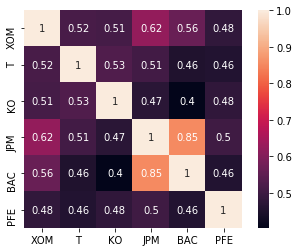

In [40]:
import seaborn as sns
corr = my_portfolio_log_ret.corr()
sns.heatmap(corr,square=True,annot=True);

In [41]:
# from pandas.plotting import scatter_matrix
# scatter_matrix(my_portfolio_log_ret, figsize=(16,12), alpha=0.3);

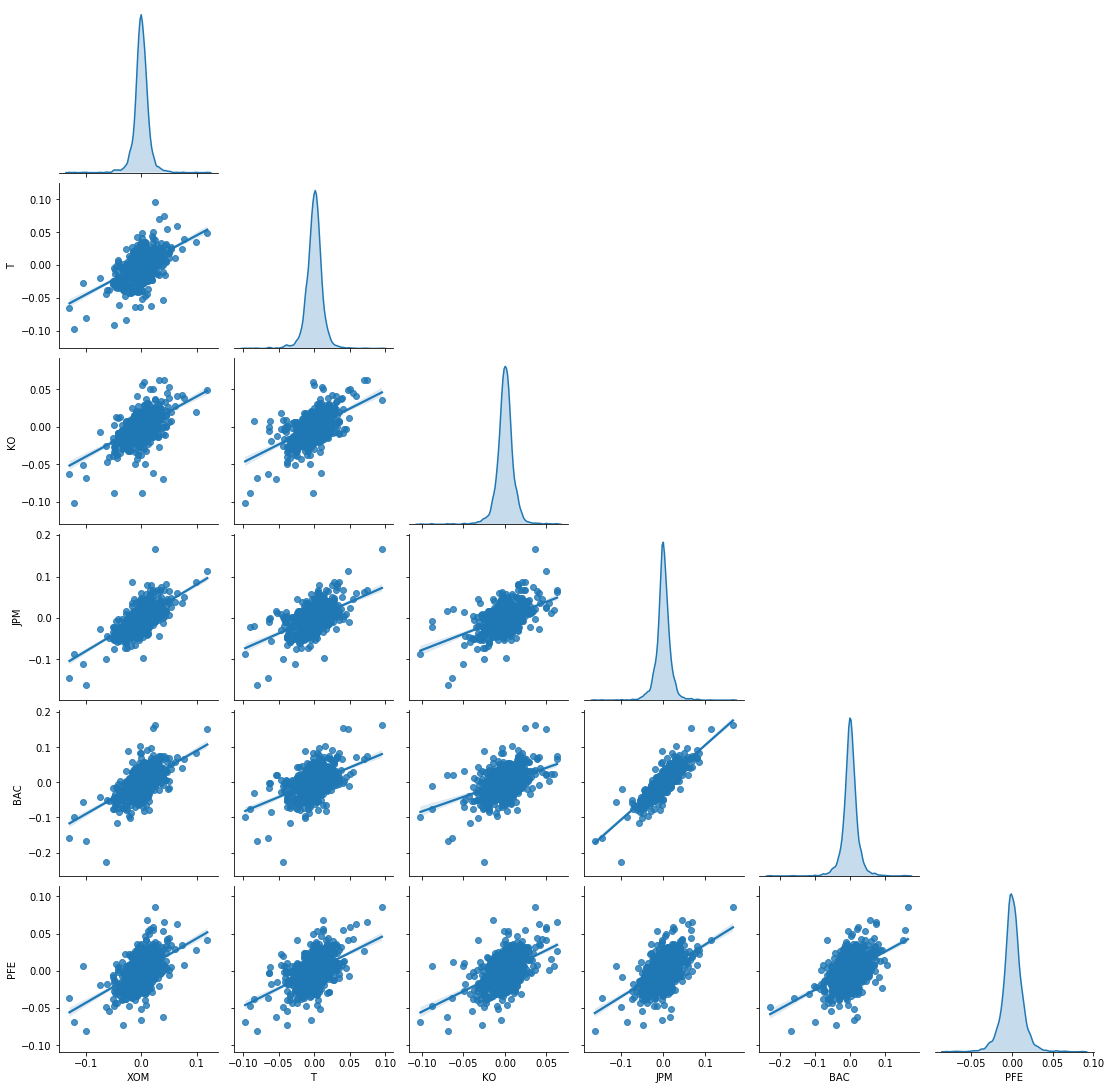

In [42]:
sns.pairplot(my_portfolio_log_ret,kind="reg",diag_kind="kde",corner=True);

# Porfolio Risk

***Variance vs Volatility***<br/>
***Variance*** is a measure of distribution of returns and is not neccesarily bound by any time period. ***Volatility*** is a measure of the standard deviation (square root of the variance) over a certain time interval. In finance, ***variance*** and ***volatility*** both gives you a sense of an asset's ***risk***.

In [43]:
weights_arr_1=np.array(weights_l_1)
weights_arr_1

array([0.49201863, 0.121689  , 0.10398899, 0.1080953 , 0.06847615,
       0.10573192])

Porfolio Variance

In [44]:
pfolio_1_var = np.dot(weights_arr_1.T, np.dot(my_portfolio_log_ret.cov()*252,weights_arr_1))
pfolio_1_var

0.0342878226578731

Porfolio Volatility(stardard deviation)

In [45]:
pfolio_1_vol = (np.dot(weights_arr_1.T, np.dot(my_portfolio_log_ret.cov() * 252, weights_arr_1))) ** 0.5
pfolio_1_vol

0.1851697131225112

In [46]:
np.sqrt(pfolio_1_var)

0.1851697131225112

In [47]:
print ('Porfolio Volatility(std,risk): {}%'.format( (round(pfolio_1_vol,5)*100)))

Porfolio Volatility(std,risk): 18.517%


# Diversifiable and Non-Diversifiable Porfolio Risk

#### Diversifiable Risk:
\begin{equation*}
 Diversifiable Risk = Porfolio Variance - \sum Weighted Annual Variances  
\end{equation*}

Unsystematic risk is unique to a specific company or industry. Also known as “nonsystematic risk,” "specific risk," "diversifiable risk" or "residual risk," in the context of an investment portfolio, unsystematic risk can be reduced through diversification.
https://www.investopedia.com/terms/u/unsystematicrisk.asp

Diversifiable Risk, also known as unsystematic risk, is defined as the danger of an event that would affect an industry and not the market. This type of risk can only be mitigated through diversifying investments and maintaining a portfolio diversification. You can of this like putting all of your eggs in one basket.
https://www.myaccountingcourse.com/accounting-dictionary/diversifiable-risk


In [48]:
weights_arr_1

array([0.49201863, 0.121689  , 0.10398899, 0.1080953 , 0.06847615,
       0.10573192])

In [49]:
# for t in tickers:
#     """
#     This will make a variable for each one of the stocks in the ticker list
#     and fill it with each annual variance.
    
#     Might be useful later
#     """
#     nombre_df = str(t)+"_var_ann"
#     globals()[nombre_df] = my_portfolio_log_ret[t].var()*252


In [50]:
for t in tickers:
    """
    This will get the diversifiable risk for the full porfolio
    """
    stock_annual_variance =  my_portfolio_log_ret[t].var()*252

    count = 0
    weighted_annual_variace = (weights_arr_1[count] **2 * stock_annual_variance)
    
    #Diversifiable risk = Porfolio Variance - ∑ Weighted Annual Variances
    diversifiable_risk = pfolio_1_var
    diversifiable_risk -= weighted_annual_variace

diversifiable_risk

0.02483643676426798

In [51]:
print("Non-Diversifiable risk: {}%".format((round(diversifiable_risk*100,2))))

Non-Diversifiable risk: 2.48%


#### Non-Diversifiable Risk:

\begin{equation*}
 Non-Diversifiable Risk = Porfolio Variance - Diversifiable Risk  
 \end{equation*}
 
 \begin{equation*}
 Non-Diversifiable Risk = \sum Weighted Annual Variances  
\end{equation*}

Non-diversifiable risk can be referred to a risk which is common to a whole class of assets or liabilities. The investment value might decline over a specific period of time only due to economic changes or other events which affect large sections of the market. However, diversification and asset allocation can provide protection against non-diversifiable risk as different sections of the market have a tendency to underperform at different times. Non-diversifiable risk can also be referred as market risk or systematic risk.

Being unavoidable and non-compensating for exposure to such risks, non-diversifiable risk can be taken as the significant section of an asset’s risk attributable to market factors affecting all firms. The main reasons for this risk type include inflation, war, political events, and international incidents. Moreover, it cannot be purged through diversification.

https://www.readyratios.com/reference/analysis/non_diversifiable_risk.html

In [52]:
non_diversifiable_risk_1 = pfolio_1_var - diversifiable_risk
non_diversifiable_risk_1

0.00945138589360512

In [53]:
for t in tickers:
    """
    This will get the non-diversifiable risk for the full porfolio
    """
    stock_annual_variance =  my_portfolio_log_ret[t].var()*252

    count = 0
    weighted_annual_variace = (weights_arr_1[count] **2 * stock_annual_variance)
    
    #Diversifiable risk = Porfolio Variance - ∑ Weighted Annual Variances
    non_diversifiable_risk_2 = 0
    non_diversifiable_risk_2 += weighted_annual_variace

non_diversifiable_risk_2

0.009451385893605118

In [54]:
non_diversifiable_risk_2 - non_diversifiable_risk_1

-1.734723475976807e-18

In [55]:
print("Non-Diversifiable risk: {}%".format((round(non_diversifiable_risk_1*100,2))))

Non-Diversifiable risk: 0.95%


# Regresions

In statistical modeling, ***regression analysis*** is a set of statistical processes for estimating the relationships between a dependent variable (often called the 'outcome variable') and one or more independent variables (often called 'predictors', 'covariates', or 'features').
<br/> The most common form of regression analysis is ***linear regression***, in which a researcher finds the line (or a more complex linear combination) that most closely fits the data according to a specific mathematical criterion. 

https://en.wikipedia.org/wiki/Regression_analysis

In this section we'll make some featurues from the High	Low	Open	Close	Volume	Adj Close comuns, in order to feed our models

In [56]:
from scipy import stats
import statsmodels.api as sm

In [57]:
BAC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,15.750000,15.120000,15.240000,15.690000,180845200.0,14.010186
2010-01-05,16.209999,15.700000,15.740000,16.200001,209521300.0,14.465584
2010-01-06,16.540001,16.030001,16.209999,16.389999,205257900.0,14.635240
2010-01-07,17.190001,16.510000,16.680000,16.930000,320868400.0,15.117428
2010-01-08,17.100000,16.629999,16.980000,16.780001,220104700.0,14.983487


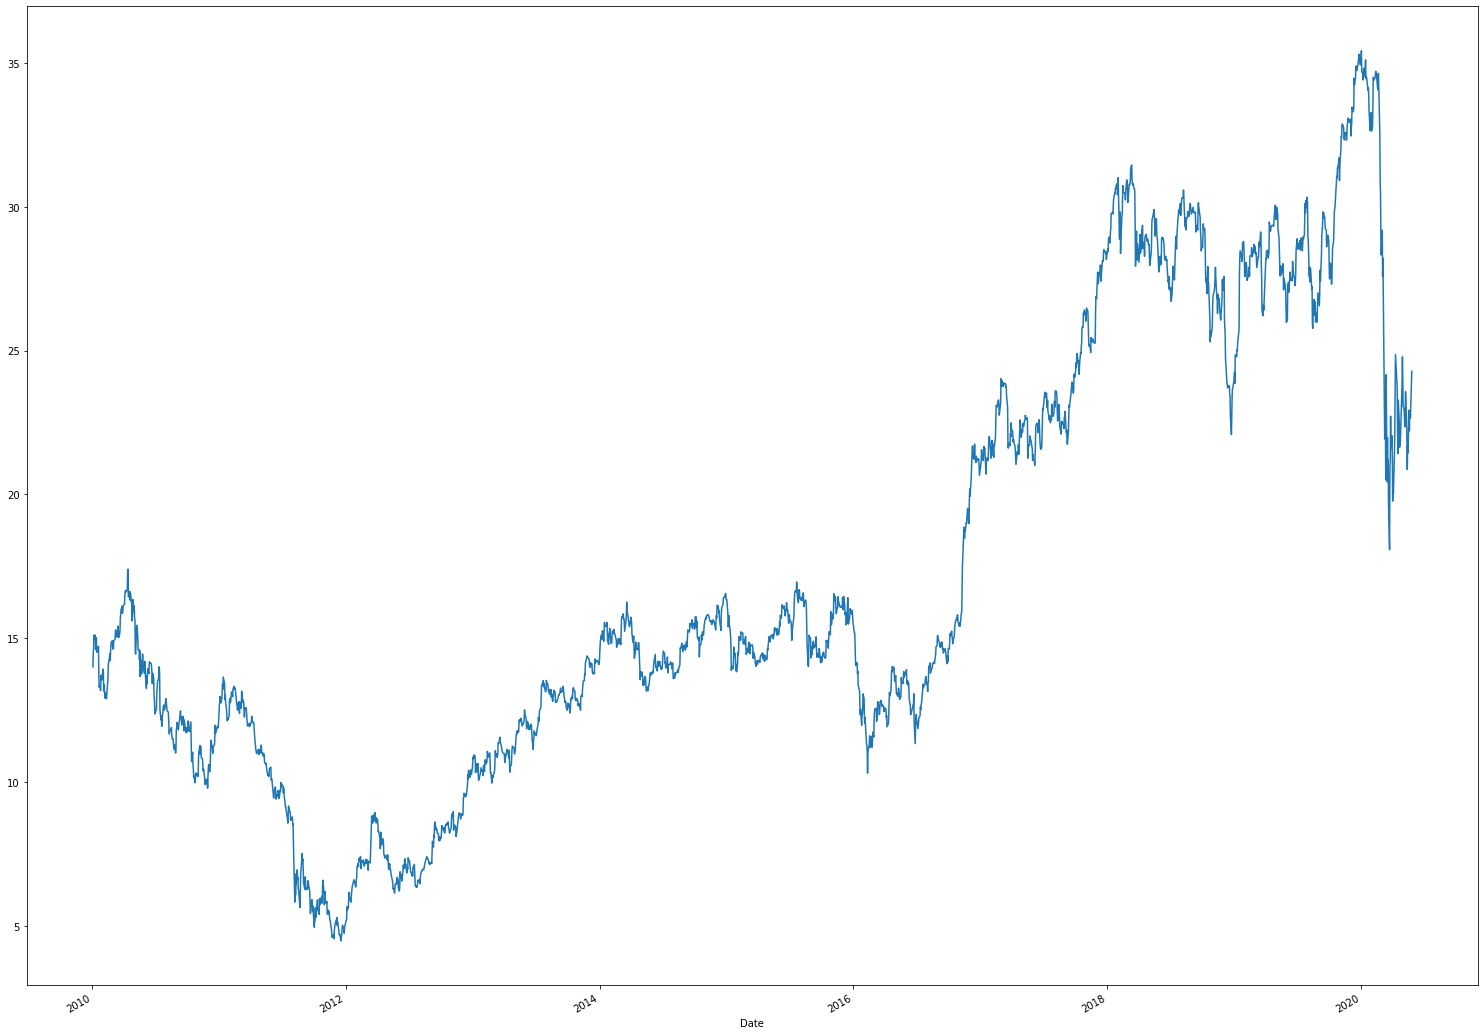

In [58]:
BAC['Adj Close'].plot(figsize=(26,20));

***simple moving average (SMA)***
<br/>A ***simple moving average (SMA)*** calculates the average of a selected range of prices, usually closing prices, by the number of periods in that range.


https://www.investopedia.com/terms/s/sma.asp

In [59]:
rolling_mean = BAC['Adj Close'].rolling(window=20).mean()

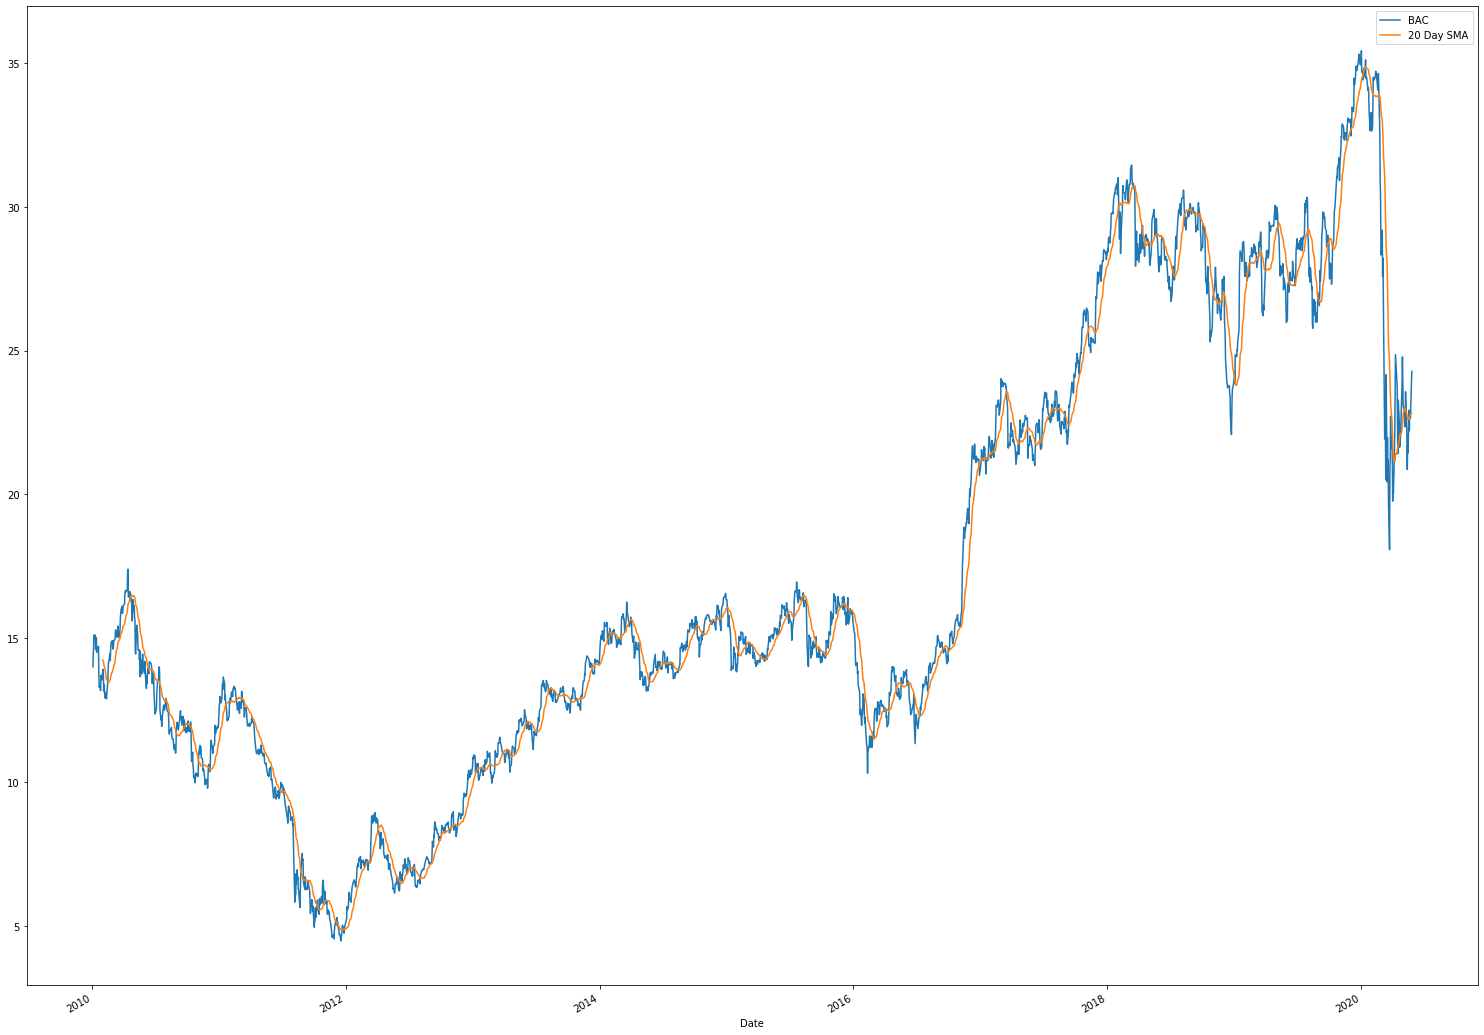

In [60]:
BAC['Adj Close'].plot(figsize=(26,20), label = 'BAC')
rolling_mean.plot(figsize=(26,20), label = '20 Day SMA');
plt.legend(loc='best')
plt.show()

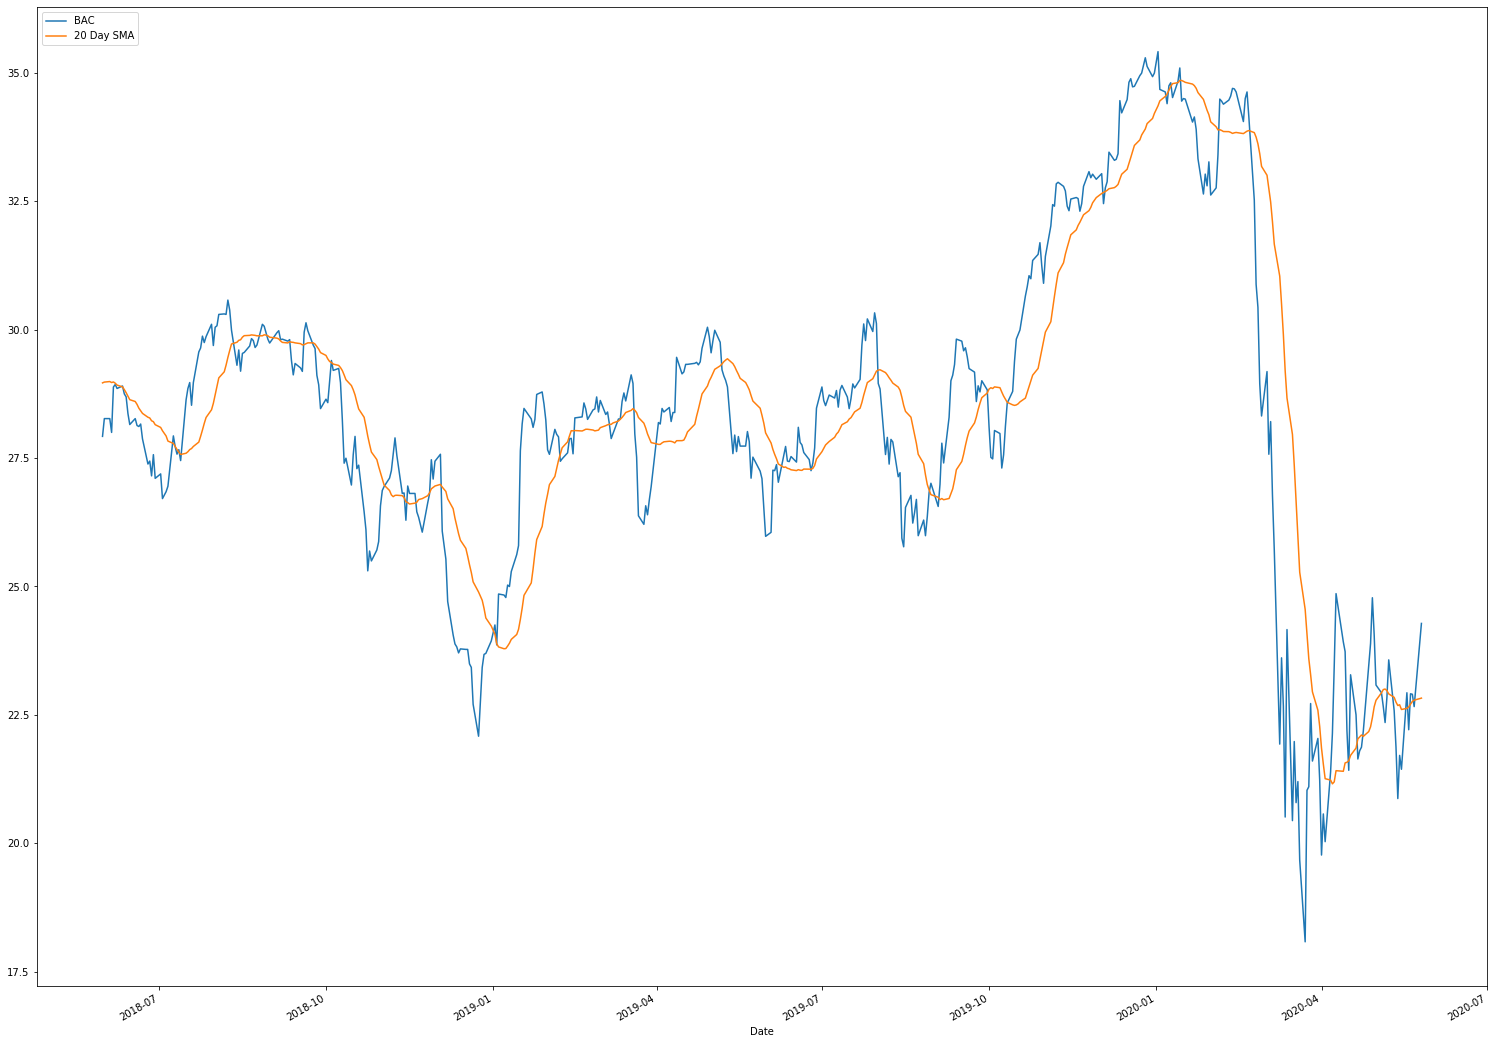

In [61]:
BAC['Adj Close'].iloc[-504:].plot(figsize=(26,20), label = 'BAC')
rolling_mean.iloc[-504:].plot(figsize=(26,20), label = '20 Day SMA');
plt.legend(loc='upper left')
plt.show()

In [62]:
data = pd.DataFrame()

In [63]:
data['BAC'] = BAC['Adj Close']
data['SMA'] = rolling_mean

In [64]:
data.dropna(inplace=True)
data.tail()

,BAC,SMA
Date,,
2020-05-19,22.209999,22.6540
2020-05-20,22.910000,22.7095
2020-05-21,22.900000,22.7610
2020-05-22,22.660000,22.7850
2020-05-26,24.280001,22.8255


In [65]:
data.describe()

,BAC,SMA
count,2597.000000,2597.000000
mean,17.148358,17.116866
std,7.691271,7.657820
min,4.490397,4.851672
25%,11.964753,11.967204
50%,14.716839,14.690147
75%,23.419115,22.991805
max,35.414032,34.853609


### Univariate Regression

Univariate linear regression focuses on determining relationship between one independent (explanatory variable) variable and one dependent variable.

\begin{equation*}
 Y = α + βx + ε  
\end{equation*}

Best fitting line minimizes the sum of squared residuals(SSR).
Sum of squared residuals(SSR), is the sum of the differences between the values of our data and the prediction of our model(line). 

The coefficients found with this technice are called OLS estmates (ordinary least square estimates).


Useful information: https://stackoverflow.com/questions/56930145/univariate-regression-in-python

Variance: measure variavility of data
\begin{equation*}
 VAR(S^2) =  \frac{\sum(x- μ)^2}{ n-1}
\end{equation*}



Total Sum of Squares(TSS): provide a sense of the variability of data
\begin{equation*}
 TSS= \sum (x- μ)^2 
\end{equation*}

R^2: the higher it is, the more predictive power the model has
\begin{equation*}
 R^2= 1 -  \frac{SSR}{TSS}
\end{equation*}




X is the data with what we feed our model, Y is the values we want to estimate(or predict)

In [66]:
X = data['SMA']
Y = data['BAC']

In [67]:
X, Y

(Date
 2010-02-01    14.245475
 2010-02-02    14.241458
 2010-02-03    14.211544
 2010-02-04    14.138323
 2010-02-05    14.052155
                 ...    
 2020-05-19    22.654000
 2020-05-20    22.709500
 2020-05-21    22.761000
 2020-05-22    22.785000
 2020-05-26    22.825500
 Name: SMA, Length: 2597, dtype: float64,
 Date
 2010-02-01    13.769095
 2010-02-02    13.929828
 2010-02-03    13.867316
 2010-02-04    13.170826
 2010-02-05    13.394063
                 ...    
 2020-05-19    22.209999
 2020-05-20    22.910000
 2020-05-21    22.900000
 2020-05-22    22.660000
 2020-05-26    24.280001
 Name: BAC, Length: 2597, dtype: float64)

A plot SMA vs Price, we can see that it looks like there is a linear relationship between them. This makes absolutely sense, asi the SMA is a mean of the prices

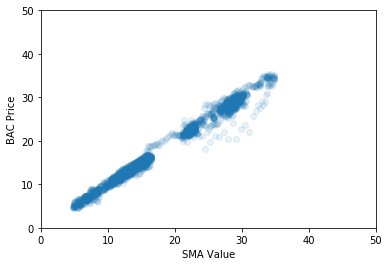

In [68]:
plt.scatter(X,Y, alpha=0.1)
plt.axis([0,50,0,50])
plt.ylabel('BAC Price')
plt.xlabel('SMA Value')
plt.show()

If we plot the volume vs the price, at least a linear relationship can't be seen. It makes "sense" as volume is how much the stock is trade, and it doesn't have a direct relationship in the stoch price

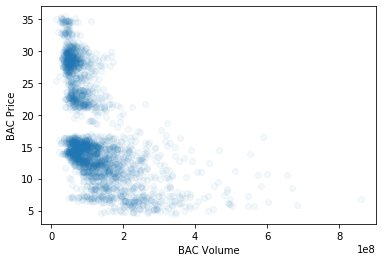

In [69]:
plt.scatter(BAC['Volume'],BAC['Adj Close'], alpha=0.05)
# plt.axis([0,50,0,50])
plt.ylabel('BAC Price')
plt.xlabel('BAC Volume')
plt.show()

#### Ordinary least squares(OLS)

In statistics, ***ordinary least squares (OLS)*** is a type of linear least squares method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by the principle of least squares: minimizing the sum of the squares of the differences between the observed dependent variable (values of the variable being observed) in the given dataset and those predicted by the linear function.

In [70]:
X1 = sm.add_constant(X)

reg = sm.OLS(Y,X1).fit()

In [71]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BAC   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 1.776e+05
Date:                Wed, 27 May 2020   Prob (F-statistic):               0.00
Time:                        00:13:21   Log-Likelihood:                -3476.3
No. Observations:                2597   AIC:                             6957.
Df Residuals:                    2595   BIC:                             6968.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0810      0.044      1.825      0.068      -0.006       0.168
SMA            0.9971      0.002    421.437      0.000       0.992       1.002
==============================================================================
Omnibus:                     1384.760   Durbin-Watson:                   0.145
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28355.933
Skew:                          -2.068   Prob(JB):                         0.00
Kurtosis:                      18.650   Cond. No.                         46.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Alpha, Beta, R^2:

***Alpha***
<br/>The alpha of a portfolio is the excess return it produces compared to a benchmark index.

A mathematical estimate of the amount of return expected from an investment's inherent values. It measures the difference between a stock's actual performance and the performance anticipated in light of the stock's risk and the behavior of the market.

***Beta***
<br/>Represents an asset's exposure to the market(typically represented as the S&P500. Having a strategy, or portfolio with low beta is atractive because it's movement would be "independent" from the market.

A relative measure of the historical sensitivity of the stock's price to overall fluctuations in the Index. A Beta of 1.5 indicates a stock tends to rise (or fall) 50% more than this index.



***R-Squared***
<br/>This means how well our Y is explained by our X.


A measure of the squared correlation between a stock's performance and that of the broader market as measured by an appropriate index. In other words, it measures how reliable the stock's beta is in judging its market sensitivity. Though a little more esoteric, R-Squared is similar to Beta, but in this case tells you what proportion of a stock's risk is market-related, a figure that cannot be adjusted by diversification the way beta can. A completely diversified portfolio would be perfectly correlated to the market, indicative of an R-Squared figure of 1.0. An R-Squared of 0, on the other hand, indicates that the beta measurement is irrelevant to its actual performance.



https://infolific.com/money-management/investing/alpha-beta-and-r-squared-investing-definitions/

In [72]:
slope, intercept, r_value, p_value, std_error= stats.linregress(X,Y)

 Y = Mx + B

In [73]:
slope #M

0.9971104031524575

In [74]:
intercept #B

0.08095268967544555

In [75]:
r_value**2

0.985599647587491

In [76]:
p_value

0.0

In [77]:
std_error

0.0023659788431126694

### Multivariate Regression

The Multivariate Regression model, relates more than one predictor and more than one response.
Multiple beta coefficients and explanatory variables.

\begin{equation*}
 Y = β_0 + β_2x_1 + β_2x_2 + β_ix_i + ε_i  
\end{equation*}

Beta coefficients estimated in a multivariate regression can be interpreted as the marginal impacto of the explanatory variable.


https://brilliant.org/wiki/multivariate-regression/

In [78]:
BAC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,15.750000,15.120000,15.240000,15.690000,180845200.0,14.010186
2010-01-05,16.209999,15.700000,15.740000,16.200001,209521300.0,14.465584
2010-01-06,16.540001,16.030001,16.209999,16.389999,205257900.0,14.635240
2010-01-07,17.190001,16.510000,16.680000,16.930000,320868400.0,15.117428
2010-01-08,17.100000,16.629999,16.980000,16.780001,220104700.0,14.983487


A little of feature engineering:

The average True Range(ATR), is a mean of the range of the prices. It means Volatility. When the proce changes dramatically, the ATR will rise, and if the price does not change too mucho, the ATR will remain low.

In [79]:
data['ATR_5']=BAC['High'].subtract(BAC['Low']).rolling(5).mean()
data.dropna(inplace=True)

In [80]:
data['Vol']=BAC['Volume']/1000
data.dropna(inplace=True)

In [81]:
# data.drop('Volume', axis=1,inplace=True)

In [82]:
data.describe()

,BAC,SMA,ATR_5,Vol
count,2597.000000,2597.000000,2597.000000,2597.000000
mean,17.148358,17.116866,0.393792,117247.911937
std,7.691271,7.657820,0.228102,82426.068889
min,4.490397,4.851672,0.116000,13805.400000
25%,11.964753,11.967204,0.256000,63061.800000
50%,14.716839,14.690147,0.338000,92414.200000
75%,23.419115,22.991805,0.462000,145079.600000
max,35.414032,34.853609,2.400000,859643.400000


Now we use multiple variables. 
We feed our model with more variables than before, trying to approximate or "explain" Y.

In [83]:
X = data[['SMA','ATR_5','Vol']]
Y = data['BAC']

In [84]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y,X1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BAC   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 7.695e+04
Date:                Wed, 27 May 2020   Prob (F-statistic):               0.00
Time:                        00:13:23   Log-Likelihood:                -3139.2
No. Observations:                2597   AIC:                             6286.
Df Residuals:                    2593   BIC:                             6310.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2314      0.065      3.584      0.000       0.105       0.358
SMA            1.0372      0.003    329.736      0.000       1.031       1.043
ATR_5         -2.3405      0.088    -26.544      0.000      -2.513      -2.168
Vol         7.275e-07   2.51e-07      2.900      0.004    2.36e-07    1.22e-06
==============================================================================
Omnibus:                      382.689   Durbin-Watson:                   0.203
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5742.612
Skew:                          -0.041   Prob(JB):                         0.00
Kurtosis:                      10.284   Cond. No.                     8.04e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.04e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
X = data[['SMA','ATR_5']]
Y = data['BAC']

X1 = sm.add_constant(X)
reg = sm.OLS(Y,X1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BAC   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.151e+05
Date:                Wed, 27 May 2020   Prob (F-statistic):               0.00
Time:                        00:13:23   Log-Likelihood:                -3143.4
No. Observations:                2597   AIC:                             6293.
Df Residuals:                    2594   BIC:                             6310.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3774      0.040      9.319      0.000       0.298       0.457
SMA            1.0314      0.002    425.271      0.000       1.027       1.036
ATR_5         -2.2415      0.081    -27.531      0.000      -2.401      -2.082
==============================================================================
Omnibus:                      380.892   Durbin-Watson:                   0.200
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5676.287
Skew:                          -0.029   Prob(JB):                         0.00
Kurtosis:                      10.242   Cond. No.                         97.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### A little more basic, but interesting

In [237]:
data['BAC'] = BAC['Adj Close']

data['Vol'] = BAC['Volume']

data['ret'] = data['BAC'].pct_change(1)
data.tail()

,BAC,SMA,ATR_5,Vol,green,ret
Date,,,,,,
2020-05-19,22.209999,22.6540,0.998,62179000.0,0,-0.031400
2020-05-20,22.910000,22.7095,0.864,59789500.0,0,0.031517
2020-05-21,22.900000,22.7610,0.624,57726000.0,0,-0.000437
2020-05-22,22.660000,22.7850,0.628,48107000.0,0,-0.010480
2020-05-26,24.280001,22.8255,0.610,119368200.0,0,0.071492


Boolean indexing to see if the price went up or down, by doing boolean indexing of the feature we want to "predict" we make the prediction to be a classification problem.

By doing this, a regression would not be "appropiate" method, as they are usually used to estimate a value by using parameters or features.

An example would be trying to approximate a house value.
#rooms, house age, location,m^2,etc. would be used as features to approximate a value, not to classify a value.

Anyways, we'll do it just to have the option to use this in the future(maybe for stock valuation; using P/E, EBTDA, debt/total asset ratios,etc.)

In [299]:
data['green'] = np.where(data['BAC'].pct_change(1) > 0,1,0)

In [300]:
data.head()

,BAC,SMA,ATR_5,Vol,ret,red,green
Date,,,,,,,
2010-02-03,13.867316,14.211544,0.400,130861600.0,-0.004488,0,0
2010-02-04,13.170826,14.138323,0.424,252558700.0,-0.050225,1,0
2010-02-05,13.394063,14.052155,0.482,297683300.0,0.016949,0,1
2010-02-08,12.929734,13.949468,0.522,208207300.0,-0.034667,0,0
2010-02-09,12.920805,13.839636,0.554,251522100.0,-0.000691,1,0


We make a shift in the return, so the value that is in date X(2010-02-04) actually corresponds to X+1(2010-02-05). This will make things easiert when we hace to use a model.

In [301]:
data['green'] = data['green'].shift(-1)
data.head()

,BAC,SMA,ATR_5,Vol,ret,red,green
Date,,,,,,,
2010-02-03,13.867316,14.211544,0.400,130861600.0,-0.004488,0,0.0
2010-02-04,13.170826,14.138323,0.424,252558700.0,-0.050225,1,1.0
2010-02-05,13.394063,14.052155,0.482,297683300.0,0.016949,0,0.0
2010-02-08,12.929734,13.949468,0.522,208207300.0,-0.034667,0,0.0
2010-02-09,12.920805,13.839636,0.554,251522100.0,-0.000691,1,1.0


After I've realized that is easier to calculate the relationship between today's price and tomorrow's price by doing pct_change(-1). We can see if we shift "green" one backwards it equals red

In [302]:
data['red'] =np.where(data['BAC'].pct_change(-1) < 0,1,0)
data.dropna(inplace=True)
(data['red']==data['green']).unique()

array([ True])

In [304]:
data.columns

Index(['BAC', 'SMA', 'ATR_5', 'Vol', 'ret', 'red', 'green'], dtype='object')

In [305]:
data['ATR_5'] = BAC['High'].subtract(BAC['Low']).rolling(5).mean()
data['ATR_10'] = BAC['High'].subtract(BAC['Low']).rolling(10).mean()
data['ATR_20'] = BAC['High'].subtract(BAC['Low']).rolling(20).mean()
data['ATR_30'] = BAC['High'].subtract(BAC['Low']).rolling(30).mean()
data['ATR_50'] = BAC['High'].subtract(BAC['Low']).rolling(50).mean()

In [306]:
data['SMA_10'] = BAC['Adj Close'].rolling(window=10).mean()
data['SMA_10'] = BAC['Adj Close'].rolling(window=10).mean()
data['SMA_20'] = BAC['Adj Close'].rolling(window=20).mean()
data['SMA_30'] = BAC['Adj Close'].rolling(window=30).mean()
data['SMA_40'] = BAC['Adj Close'].rolling(window=40).mean()
data['SMA_50'] = BAC['Adj Close'].rolling(window=50).mean()

More booleans, in this case I don't believe a "value" will be a powefull feature to describe if the day of tomorrow prices will go up or down. First we make more features

In [308]:
#SMA

data['10-20SMA'] = data['SMA_10'] - data['SMA_20']
data['10-30SMA'] = data['SMA_10'] - data['SMA_30']
data['10-40SMA'] = data['SMA_10'] - data['SMA_40']
data['10-50SMA'] = data['SMA_10'] - data['SMA_50']

data['20-30SMA'] = data['SMA_20'] - data['SMA_30']
data['20-40SMA'] = data['SMA_20'] - data['SMA_40']
data['20-50SMA'] = data['SMA_20'] - data['SMA_50']

data['30-40SMA'] = data['SMA_30'] - data['SMA_40']
data['30-50SMA'] = data['SMA_30'] - data['SMA_50']

data['40-50SMA'] = data['SMA_40'] - data['SMA_50']

In [309]:
#ATR
data['5-10ATR'] = data['ATR_5'] - data['ATR_10']
data['5-20ATR'] = data['ATR_5'] - data['ATR_20']
data['5-30ATR'] = data['ATR_5'] - data['ATR_30']
data['5-50ATR'] = data['ATR_5'] - data['ATR_50']

data['10-20ATR'] = data['ATR_10'] - data['ATR_20']
data['10-30ATR'] = data['ATR_10'] - data['ATR_30']
data['10-50ATR'] = data['ATR_10'] - data['ATR_50']

data['20-30ATR'] = data['ATR_20'] - data['ATR_30']
data['20-50ATR'] = data['ATR_20'] - data['ATR_50']

data['30-50ATR'] = data['ATR_30'] - data['ATR_50']

In [315]:
data.iloc[:,7:].head(1)

,ATR_10,ATR_20,ATR_30,ATR_50,SMA_10,SMA_20,SMA_30,SMA_40,SMA_50,10-20SMA,...,5-10ATR,5-20ATR,5-30ATR,5-50ATR,10-20ATR,10-30ATR,10-50ATR,20-30ATR,20-50ATR,30-50ATR
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-03,0.583,0.5465,NaN,NaN,13.609258,14.211544,NaN,NaN,NaN,-0.602286,...,-0.183,-0.1465,NaN,NaN,0.0365,NaN,NaN,NaN,NaN,NaN


Boolean mask

In [316]:
data[data.iloc[:,7:]>0] = 1.0
data[data.iloc[:,:]<0] = 0.0

In [317]:
data.head()

,BAC,SMA,ATR_5,Vol,ret,red,green,ATR_10,ATR_20,ATR_30,...,5-10ATR,5-20ATR,5-30ATR,5-50ATR,10-20ATR,10-30ATR,10-50ATR,20-30ATR,20-50ATR,30-50ATR
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-03,13.867316,14.211544,0.400,130861600.0,0.000000,0,0.0,1.0,1.0,NaN,...,0.0,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2010-02-04,13.170826,14.138323,0.424,252558700.0,0.000000,1,1.0,1.0,1.0,NaN,...,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2010-02-05,13.394063,14.052155,0.482,297683300.0,0.016949,0,0.0,1.0,1.0,NaN,...,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2010-02-08,12.929734,13.949468,0.522,208207300.0,0.000000,0,0.0,1.0,1.0,NaN,...,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2010-02-09,12.920805,13.839636,0.554,251522100.0,0.000000,1,1.0,1.0,1.0,NaN,...,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [319]:
data.drop(['green', 'ret','BAC','SMA','ATR_5','Vol'],axis=1, inplace=True)
data.dropna(inplace=True)
data.head(1)

,red,ATR_10,ATR_20,ATR_30,ATR_50,SMA_10,SMA_20,SMA_30,SMA_40,SMA_50,...,5-10ATR,5-20ATR,5-30ATR,5-50ATR,10-20ATR,10-30ATR,10-50ATR,20-30ATR,20-50ATR,30-50ATR
Date,,,,,,,,,,,,,,,,,,,,,
2010-03-16,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [321]:
data.head()

,red,ATR_10,ATR_20,ATR_30,ATR_50,SMA_10,SMA_20,SMA_30,SMA_40,SMA_50,...,5-10ATR,5-20ATR,5-30ATR,5-50ATR,10-20ATR,10-30ATR,10-50ATR,20-30ATR,20-50ATR,30-50ATR
Date,,,,,,,,,,,,,,,,,,,,,
2010-03-16,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-03-17,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-03-18,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-03-19,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-03-22,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Multivariate OLS

In [339]:
X = data.drop(['red','ATR_10','ATR_20','ATR_30','ATR_50','SMA_10','SMA_20','SMA_30','SMA_40','SMA_50'],axis=1)
y = data['red']

X1 = sm.add_constant(X)
reg = sm.OLS(y,X1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    red   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8337
Date:                Wed, 27 May 2020   Prob (F-statistic):              0.674
Time:                        15:34:24   Log-Likelihood:                -1851.8
No. Observations:                2563   AIC:                             3746.
Df Residuals:                    2542   BIC:                             3868.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4896      0.027     18.451      0.000       0.438       0.542
10-20SMA      -0.0081      0.030     -0.269      0.788      -0.067       0.051
10-30SMA       0.0387      0.042      0.925      0.355      -0.043       0.121
10-40SMA      -0.1042      0.052     -2.002      0.045      -0.206      -0.002
10-50SMA       0.1285      0.048      2.652      0.008       0.033       0.224
20-30SMA      -0.0146      0.033     -0.447      0.655      -0.079       0.049
20-40SMA      -0.0347      0.051     -0.680      0.496      -0.135       0.065
20-50SMA       0.0313      0.052      0.599      0.549      -0.071       0.134
30-40SMA      -0.0603      0.040     -1.510      0.131      -0.139       0.018
30-50SMA       0.0452      0.047      0.963      0.335      -0.047       0.137
40-50SMA      -0.0323      0.033     -0.969      0.333      -0.098       0.033
5-10ATR        0.0247      0.028      0.888      0.375      -0.030       0.079
5-20ATR       -0.0172      0.037     -0.467      0.641      -0.089       0.055
5-30ATR       -0.0006      0.041     -0.015      0.988      -0.081       0.079
5-50ATR        0.0063      0.037      0.169      0.866      -0.066       0.079
10-20ATR       0.0207      0.030      0.694      0.487      -0.038       0.079
10-30ATR      -0.0008      0.034     -0.024      0.981      -0.068       0.067
10-50ATR      -0.0274      0.034     -0.807      0.420      -0.094       0.039
20-30ATR       0.0140      0.027      0.516      0.606      -0.039       0.067
20-50ATR       0.0113      0.033      0.340      0.734      -0.054       0.076
30-50ATR      -0.0023      0.027     -0.086      0.932      -0.055       0.051
==============================================================================
Omnibus:                     9215.486   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              416.397
Skew:                           0.002   Prob(JB):                     3.81e-91
Kurtosis:                       1.025   Cond. No.                         19.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [332]:
X.sample(5)

,ATR_10,ATR_20,ATR_30,ATR_50,SMA_10,SMA_20,SMA_30,SMA_40,SMA_50,10-20SMA,...,5-10ATR,5-20ATR,5-30ATR,5-50ATR,10-20ATR,10-30ATR,10-50ATR,20-30ATR,20-50ATR,30-50ATR
Date,,,,,,,,,,,,,,,,,,,,,
2016-06-23,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2017-02-09,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-10-24,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2017-12-08,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2018-05-21,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [340]:
y.head()

Date
2010-03-16    1
2010-03-17    0
2010-03-18    0
2010-03-19    1
2010-03-22    1
Name: red, dtype: int32

In [335]:
print("El dataset tiene ", X.shape[0], " filas y ", X.shape[1], " columnas")

El dataset tiene  2563  filas y  20  columnas


# A little of ML

#### Supervised vs Unsupervised Learning

***Supervised***

In Supervised learning, you train the machine using data which is well "labeled." It means some data is already tagged with the correct answer.

**Types of Supervised Machine Learning Techniques:**

Regression:<br/>
Regression technique predicts a single output value using training data.

Example: You can use regression to predict the house price from training data. The input variables will be locality, size of a house, etc.

Classification:<br/>
Classification means to group the output inside a class. If the algorithm tries to label input into two distinct classes, it is called binary classification. Selecting between more than two classes is referred to as multiclass classification.

***Unsupervised***

Unsupervised learning is a machine learning technique, where you do not need to supervise the model. Instead, you need to allow the model to work on its own to discover information. It mainly deals with the unlabelled data.

Unsupervised learning algorithms allow you to perform more complex processing tasks compared to supervised learning. Although, unsupervised learning can be more unpredictable compared with other natural learning deep learning and reinforcement learning methods.

**Types of Unsupervised Machine Learning Techniques:**

Clustering:<br/>
Clustering is an important concept when it comes to unsupervised learning. It mainly deals with finding a structure or pattern in a collection of uncategorized data. Clustering algorithms will process your data and find natural clusters(groups) if they exist in the data. You can also modify how many clusters your algorithms should identify. It allows you to adjust the granularity of these groups.

Association:<br/>
Association rules allow you to establish associations amongst data objects inside large databases. This unsupervised technique is about discovering exciting relationships between variables in large databases. For example, people that buy a new home most likely to buy new furniture.

https://www.guru99.com/supervised-vs-unsupervised-learning.html

#### Let's use KNN as a benchmark

**KNN:**<br/>
K Nearest Neighbour is a simple algorithm that stores all the available cases and ***classifies*** the new data or case based on a similarity measure. It is mostly used to classifies a data point based on how its neighbours are classified.

‘k’ in KNN is a parameter that refers to the number of nearest neighbours to include in the majority of the voting process.

Basically, the data we want to classify and we look for the K nearest neigbours and the data will be the same as the mayority

https://towardsdatascience.com/a-simple-introduction-to-k-nearest-neighbors-algorithm-b3519ed98e

In [343]:
from sklearn.neighbors import KNeighborsClassifier

In [344]:
model_knn = KNeighborsClassifier()

n_neighbors: Number of neighbors to use by default for kneighbors queries.

In [345]:
params = {"n_neighbors":list(range(3,8))}

In [350]:
params

{'n_neighbors': [3, 4, 5, 6, 7]}

***Cross Validation***<br/>
This process of deciding whether the numerical results quantifying hypothesized relationships between variables, are acceptable as descriptions of the data, is known as validation.
The problem with this evaluation technique is that it does not give an indication of how well the learner will generalize to an independent/ unseen data set. Getting this idea about our model is known as Cross Validation.


***Holdout Method***<br/>
Now a basic remedy for this involves removing a part of the training data and using it to get predictions from the model trained on rest of the data. The error estimation then tells how our model is doing on unseen data or the validation set. This is a simple kind of cross validation technique, also known as the holdout method.

***K-Fold Cross Validation***<br/>
As there is never enough data to train your model, removing a part of it for validation poses a problem of underfitting. By reducing the training data, we risk losing important patterns/ trends in data set, which in turn increases error induced by bias.
In ***K Fold cross validation***, the data is divided into k subsets. Now the holdout method is repeated k times, such that each time, one of the k subsets is used as the test set/ validation set and the other k-1 subsets are put together to form a training set.



https://towardsdatascience.com/cross-validation-in-machine-learning-72924a69872f

Train test split:

In [336]:
from sklearn.model_selection import train_test_split

In [341]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

***Grid search*** is the process of performing hyper parameter tuning in order to determine the optimal values for a given model. This is significant as the performance of the entire model is based on the hyper parameter values specified.

https://medium.com/datadriveninvestor/an-introduction-to-grid-search-ff57adcc0998

In [347]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [352]:
knn = GridSearchCV(model_knn, params, verbose= True)

***StandardScaler***<br/>
The idea behind ***StandardScaler*** is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.
In case of multivariate data, this is done feature-wise (in other words independently for each column of the data).
Given the distribution of the data, each value in the dataset will have the mean value subtracted, and then divided by the standard deviation of the whole dataset (or feature in the multivariate case).

Maybe with this data(only booleans) this is not useful/neccesary, but with other data it has to be done

In [354]:
from sklearn.preprocessing import StandardScaler

In [355]:
stds = StandardScaler()

In [356]:
X_train_knn = stds.fit_transform(X_train)

In [359]:
X_test_knn = stds.transform(X_test)

To measure ***time*** is useful. Some actions take long hours. If we know how much time our whole pipeline takes, we can schedule and organize our work.

***n_jobs*** is the number of "jobs" to run in parallel. fit, predict, decision_path and apply are all parallelized over the trees. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. 

In [361]:
import time

In [383]:
start = time.time()
knn.fit(X_train_knn, y_train)
end = time.time()
print(f"The search with knn took: {end - start:.2f} seconds")

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The search with knn took: 0.62 seconds


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.5s finished


In [384]:
knn.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

***AUC - ROC Curve***<br/>
When we need to check or visualize the performance of the multi - ***class classification*** problem, we use ***AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve***. It is one of the most important evaluation metrics for checking any classification model’s performance. It is also written as AUROC (Area Under the Receiver Operating Characteristics)

***AUC - ROC curve*** is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between patients with disease and no disease.
The ROC curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis.

https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

***Confusion Matrix***<br/>
it is a performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values.<br/>
It is extremely useful for measuring Recall, Precision, Specificity, Accuracy and most importantly AUC-ROC Curve.

***True Positive:***<br/>
Interpretation: You predicted positive and it’s true.
You predicted that a woman is pregnant and she actually is.
<br/>***True Negative:***<br/>
Interpretation: You predicted negative and it’s true.
You predicted that a man is not pregnant and he actually is not.
<br/>***False Positive: (Type 1 Error)***<br/>
Interpretation: You predicted positive and it’s false.
You predicted that a man is pregnant but he actually is not.
<br/>***False Negative: (Type 2 Error)***<br/>
Interpretation: You predicted negative and it’s false.
You predicted that a woman is not pregnant but she actually is.
Just Remember, We describe predicted values as Positive and Negative and actual values as True and False.

https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

In [385]:
from sklearn.metrics import roc_auc_score

In [386]:
y_predicted_knn = knn.predict_proba(X_test_knn)
knn_auc = roc_auc_score(y_test, y_predicted_knn[:,1])
print("El valor del AUC es: ", knn_auc)

El valor del AUC es:  0.5


The fact that our AUC is approximately 0.5, means that is almost the same to do a random classification than using our trained model

In [387]:
# pip install scikit-plot

In [388]:
from scikitplot.metrics import plot_roc

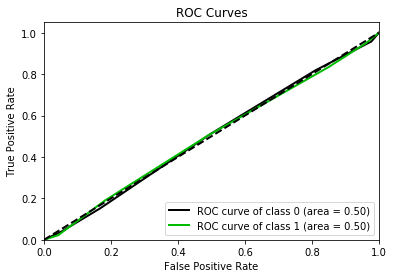

In [389]:
plot_roc(y_test, y_predicted_knn, plot_micro=False, plot_macro=False);

**Random Forest:**<br/>

RF is based on decision trees. In machine learning decision trees are a technique for creating predictive models. They are called decision trees because the prediction follows several branches of “if… then…” decision splits - similar to the branches of a tree. If we imagine that we start with a sample, which we want to predict a class for, we would start at the bottom of a tree and travel up the trunk until we come to the first split-off branch. 


Downsides of Random Forests are that they are black-boxes, meaning that we can’t interpret the decisions made by the model because they are too complex. RF are also somewhat prone to overfitting and they tend to be bad at predicting underrepresented classes in unbalanced datasets.

https://www.shirin-glander.de/2018/10/ml_basics_rf/

In [390]:
from sklearn.ensemble import RandomForestClassifier

In [391]:
model_rf = RandomForestClassifier()

In [392]:
import scipy.stats as st

We define the parameters of RandomizedSearchCV

In [393]:
params = {
    'n_estimators': st.randint(20,40), # Numero de arboles para hacer elfit.
    'max_depth': st.randint(3,12) #maximo de profundidad
}

n_iter :Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.

In [394]:
rf = RandomizedSearchCV(model_rf, params, n_iter = 25, verbose = True)

In [395]:
start = time.time()
rf.fit(X_train, y_train)
end = time.time()
print("La búsqueda con Random Forest llevó: ", end - start, " segundos")

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


La búsqueda con Random Forest llevó:  5.433343887329102  segundos


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    5.3s finished


In [396]:
rf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=23,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [397]:
y_predicted_rf = rf.predict_proba(X_test)

In [400]:
rf_auc = roc_auc_score(y_test,y_predicted_rf[:,1])
print("AUC value is: ", rf_auc)

AUC value is:  0.4487138263665595


0.44 AUC value is very bad

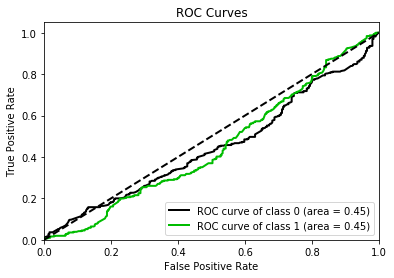

In [399]:
plot_roc(y_test, y_predicted_rf, plot_micro=False, plot_macro=False);

## XGBoost

Importamos XGBoost del módulo xgboost.sklearn que nos provee clases y métodos aceptados por la API de sklearn. La clase que contiene este clasificador se llama XGBClassifier

XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.) artificial neural networks tend to outperform all other algorithms or frameworks. However, when it comes to small-to-medium structured/tabular data, decision tree based algorithms are considered best-in-class right now.

https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d

In [404]:
# pip install xgboost

In [405]:
import xgboost as xgb
model_xgb = xgb.XGBClassifier(n_jobs=-1)

`n_jobs: con n_jobs = 1 usa el 100% de la CPU de uno de los núcleos. Cada proceso se ejecuta en un núcleo diferente. Con 4 núcleos puedo ver claramente el uso de la CPU: (100%, ~ 5%, ~ 5%, ~ 5%) cuando ejecuto n_jobs = 1 y con n_jobs = -1 veo (100%, 100%, 100%, 100%) cuando corro. Cada proceso toma el uso del 100% de un núcleo determinado, pero si tiene n_jobs = 1, solo se usa un núcleo.`

Partimos de los hiperparametros que vimos en clase

In [406]:
one_to_left = st.beta(10, 1) # Esta distribución nos dará valores entre 0 y 1 mayormente cercanos a 1

params = {  
    "n_estimators": st.randint(20,40), # Number of boosted trees to fit.
    "max_depth": st.randint(3, 12),     # Maximum tree depth for base learners.
    "learning_rate": st.uniform(0.05, 0.4), #     Boosting learning rate (xgb’s “eta”)
    "colsample_bytree": one_to_left, #     Subsample ratio of columns when constructing each tree.
    "subsample": one_to_left,     # Subsample ratio of the training instance.
    "gamma": st.uniform(0, 10), #     Minimum loss reduction required to make a further partition on a leaf node of the tree.
    'reg_alpha': st.uniform(0.05,10),   # L1 regularization term on weights
    "min_child_weight": st.uniform(1,20), #    Minimum sum of instance weight(hessian) needed in a child.
}

 <a href="http://xgboost.readthedocs.io/en/latest/python/python_api.html">Aca</a>  vemos los hiperparamentros

Realizamos la búsqueda de hiperparámetrosRandomiezSearchCV con 25 iteraciones

In [407]:
xgb_cv = RandomizedSearchCV(model_xgb, params, n_iter=25, verbose=True)

Busco el mejor set de hiperparámetros y calculamos el tiempo

In [408]:
start = time.time()
xgb_cv.fit(X_train,y_train)
end = time.time()
print("La búsqueda con XGBoost llevó: ", end - start, " segundos")

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


La búsqueda con XGBoost llevó:  9.271970510482788  segundos


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    9.1s finished


In [409]:
y_predicted_xgb = xgb_cv.predict_proba(X_test)

In [410]:
y_predicted_xgb[:,0].shape

(641,)

In [411]:
xgb_auc = roc_auc_score(y_test, y_predicted_xgb[:,1])
print("El valor del AUC es: ", xgb_auc)

El valor del AUC es:  0.4404511351456689


Graficamos la curva ROC por clase

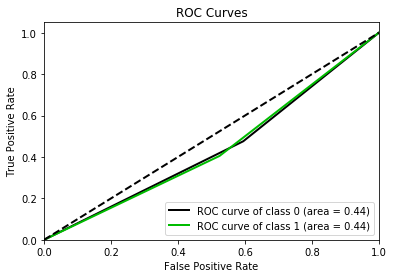

In [413]:
plot_roc(y_test, y_predicted_xgb, plot_micro=False, plot_macro=False);

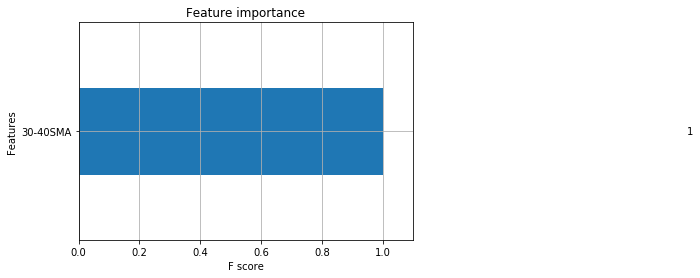

In [414]:
xgb.plot_importance(xgb_cv.best_estimator_, height=0.8, max_num_features=5);

También se pueden acceder los valores directamente con el atributo `feature_importances_`

In [415]:
print(xgb_cv.best_estimator_.feature_importances_)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## LightGBM

La librería lightgbm permite directamente interactuar con SciKitLearn

In [423]:
# pip install lightgbm

In [418]:
import lightgbm as lgb

In [419]:
model_lgb = lgb.LGBMClassifier()

 Usamos los mismos rangos de hiperparámetros que para XGBoost. La lista completa de hiperparámetros se puede consultar <a = "https://github.com/Microsoft/LightGBM/blob/master/docs/Parameters.rst"> aquí </a>

¿Es necesario normalizar los features antes de aplicar LightGBM?

In [420]:
lgb_cv = RandomizedSearchCV(model_lgb, params, n_iter = 25, verbose= True)

In [421]:
start = time.time()
lgb_cv.fit(X_train, y_train)
end = time.time()
print("La búsqueda con LightGBM llevó: ", end - start, " segundos")

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


La búsqueda con LightGBM llevó:  3.111478805541992  segundos


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    3.0s finished


In [422]:
print('Best parameters found by grid search are:', lgb_cv.best_params_)

Best parameters found by grid search are: {'colsample_bytree': 0.8207200860821121, 'gamma': 3.40782782374483, 'learning_rate': 0.3710076511568015, 'max_depth': 3, 'min_child_weight': 9.67588718374111, 'n_estimators': 22, 'reg_alpha': 6.435619573784854, 'subsample': 0.8664679796232277}


In [424]:
opt_lgb = lgb_cv.best_estimator_

In [425]:
y_predicted_lgb = lgb_cv.predict_proba(X_test)

In [426]:
lgb_auc = roc_auc_score(y_test,y_predicted_lgb[:,1])
print("El valor del AUC es: ", lgb_auc)

El valor del AUC es:  0.4393306050862321


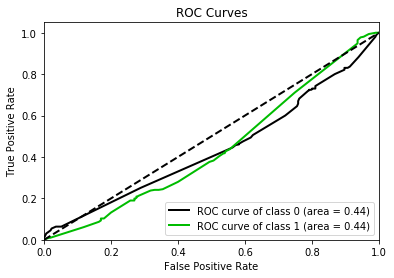

In [427]:
plot_roc(y_test, y_predicted_lgb, plot_micro=False, plot_macro=False);

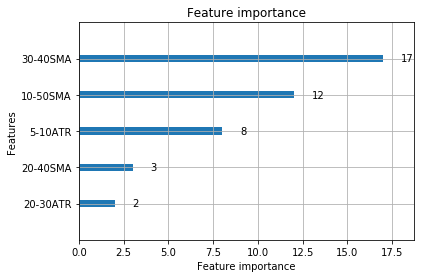

In [428]:
lgb.plot_importance(lgb_cv.best_estimator_, max_num_features=5);

Recheck

In [429]:
lgb_cv.best_estimator_.feature_importances_

array([ 0,  0,  2, 12,  0,  3,  0, 17,  0,  0,  8,  0,  0,  1,  0,  0,  0,
        2,  0,  0])

## CatBoost

In [434]:
# pip install catboost

In [435]:
import catboost as catb

model_cat = catb.CatBoostClassifier()

In [443]:
model_cat.fit(X_train, y_train,silent=True);

In [437]:
y_predicted_cat = model_cat.predict_proba(X_test)

In [442]:
cat_auc = roc_auc_score(y_test,y_predicted_cat[:,1])
print("AUC value: ", cat_auc)

AUC value:  0.5067718990548573


Hyperparameter list <a href="https://tech.yandex.com/catboost/doc/dg/concepts/python-reference_parameters-list-docpage/"> aquí </a>

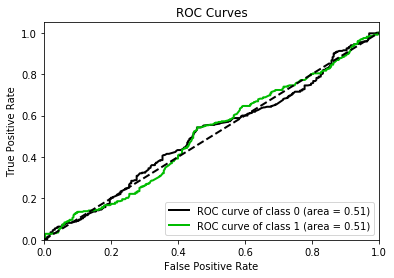

In [439]:
plot_roc(y_test,y_predicted_cat, plot_micro=False, plot_macro=False);

## ML Conclusions 

In [441]:
print("The final results were:\n - AUC knn:", knn_auc," \n - AUC RF:", rf_auc, " \n - AUC XGBoost:", xgb_auc,
     "\n - AUC LightGBM:", lgb_auc, "\n - AUC CatBoost:", cat_auc)

The final results were:
 - AUC knn: 0.5  
 - AUC RF: 0.4487138263665595  
 - AUC XGBoost: 0.4404511351456689 
 - AUC LightGBM: 0.4393306050862321 
 - AUC CatBoost: 0.5067718990548573


# Markowitz portfolio theory

Modern portfolio theory (MPT) is a theory on how risk-averse investors can construct portfolios to optimize or maximize expected return based on a given level of market risk, emphasizing that risk is an inherent part of higher reward. According to the theory, it's possible to construct an "efficient frontier" of optimal portfolios offering the maximum possible expected return for a given level of risk. This theory was pioneered by Harry Markowitz in his paper "Portfolio Selection," published in 1952 by the Journal of Finance. He was later awarded a Nobel prize for developing the MPT.

https://www.investopedia.com/simulator/

#### Sharpe ratio

The Sharpe ratio was developed by Nobel laureate William F. Sharpe and is used to help investors understand the return of an investment compared to its risk. The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Volatility is a measure of the price fluctuations of an asset or portfolio.

Subtracting the risk-free rate from the mean return allows an investor to better isolate the profits associated with risk-taking activities. The risk-free rate of return is the return on an investment with zero risk, meaning it's the return investors could expect for taking no risk. The yield for a U.S. Treasury bond, for example, could be used as the risk-free rate.

Generally, the greater the value of the Sharpe ratio, the more attractive the risk-adjusted return.


\begin{equation*}
 Sharpe Ratio =  \frac{R_p - R_f}{σ_p}
\end{equation*}

***Rp = Porfolio Return*** 

***Rf = "Risk Free Return"***

***σ = Standard Deviation of the Porfolio***

The Sharpe ratio is calculated as follows:

1. Subtract the risk-free rate from the return of the portfolio. The risk free rate could be a U.S. Treasury rate or yield, such as the one-year or two-year Treasury yield.
2. Divide the result by the standard deviation of the portfolio’s excess return. The standard deviation helps to show how much the portfolio's return deviates from the expected return. The standard deviation also sheds light on the portfolio's volatility.

https://www.investopedia.com/terms/s/sharperatio.asp

In [87]:
# my_pfolio_log_return = np.log(my_pfolio / my_pfolio.shift(1))
# my_pfolio_log_return.dropna(inplace=True)
# my_pfolio_log_return.head()

In [117]:
my_portfolio_log_ret = np.log(my_pfolio/my_pfolio.shift(1))
my_portfolio_log_ret.dropna(inplace=True)
my_portfolio_log_ret.head()

,XOM,T,KO,JPM,BAC,PFE
Date,,,,,,
2010-01-05,0.003897,-0.004911,-0.012171,0.019185,0.031988,-0.014365
2010-01-06,0.008606,-0.014741,-0.000355,0.005479,0.011660,-0.003221
2010-01-07,-0.003147,-0.011291,-0.002489,0.019615,0.032416,-0.003770
2010-01-08,-0.004020,-0.007353,-0.018682,-0.002459,-0.008900,0.008062
2010-01-11,0.011157,-0.004809,0.020105,-0.003363,0.008900,0.007998


In [89]:
# my_portfolio_log_ret = my_portfolio_log_ret[['T','PFE']]

In [118]:
my_portfolio_log_ret.head()

,XOM,T,KO,JPM,BAC,PFE
Date,,,,,,
2010-01-05,0.003897,-0.004911,-0.012171,0.019185,0.031988,-0.014365
2010-01-06,0.008606,-0.014741,-0.000355,0.005479,0.011660,-0.003221
2010-01-07,-0.003147,-0.011291,-0.002489,0.019615,0.032416,-0.003770
2010-01-08,-0.004020,-0.007353,-0.018682,-0.002459,-0.008900,0.008062
2010-01-11,0.011157,-0.004809,0.020105,-0.003363,0.008900,0.007998


In [119]:
my_portfolio_log_ret.mean() *252

XOM   -0.005057
T      0.062581
KO     0.083259
JPM    0.102080
BAC    0.052569
PFE    0.102458
dtype: float64

In [145]:
my_portfolio_log_ret.cov()*252

,XOM,T,KO,JPM,BAC,PFE
XOM,0.048907,0.021867,0.019492,0.039126,0.043932,0.021033
T,0.021867,0.036364,0.017344,0.027449,0.030598,0.017344
KO,0.019492,0.017344,0.029564,0.022957,0.024515,0.016300
JPM,0.039126,0.027449,0.022957,0.080190,0.085302,0.028177
BAC,0.043932,0.030598,0.024515,0.085302,0.124187,0.031974
PFE,0.021033,0.017344,0.016300,0.028177,0.031974,0.039042


In [121]:
# plt.figure(figsize=(10,10))
# sns.set(font_scale=1.5)
# hm = sns.heatmap(my_portfolio_log_ret.cov() * 252,
#                  cbar=True,
#                  annot=True,
#                  square=True,
#                  fmt='.4f',
#                  annot_kws={'size': 12},
#                  yticklabels=tickers,
#                  xticklabels=tickers)
# plt.title('Covariance matrix showing correlation coefficients')
# plt.tight_layout()
# plt.show()

In [122]:
corr = my_portfolio_log_ret.corr()
corr

,XOM,T,KO,JPM,BAC,PFE
XOM,1.000000,0.518515,0.512603,0.624773,0.563709,0.481344
T,0.518515,1.000000,0.528982,0.508314,0.455327,0.460294
KO,0.512603,0.528982,1.000000,0.471481,0.404578,0.479766
JPM,0.624773,0.508314,0.471481,1.000000,0.854790,0.503586
BAC,0.563709,0.455327,0.404578,0.854790,1.000000,0.459184
PFE,0.481344,0.460294,0.479766,0.503586,0.459184,1.000000


In [123]:
# plt.figure(figsize=(10,10))
# sns.set(font_scale=1.5)
# corr = my_portfolio_log_ret.corr()
# sns.heatmap(corr,square=True,annot=True);

In [124]:
num_assets = len(my_portfolio_log_ret.columns)
num_assets

6

We create random weights for the assets that sum 1

In [125]:
arr = np.random.random(num_assets)
arr

array([0.67055347, 0.94308702, 0.1096401 , 0.55343419, 0.68469893,
       0.9938064 ])

Then we make the random weights to sum 1, as the sum of weight cannot be more than 1

In [126]:
weights_l_3 = arr
weights_l_3 /= np.sum(weights_l_3)
weights_l_3

array([0.16953632, 0.2384411 , 0.02772035, 0.139925  , 0.17311272,
       0.2512645 ])

In [127]:
weights_l_3.sum()

1.0

#### Expected Porfolio Return:

In [128]:
np.sum(weights_l_3 *my_portfolio_log_ret.mean()) * 252

0.06550031116165991

#### Expected Porfolio Variance:

In [129]:
np.dot(weights_l_3.T, np.dot(my_portfolio_log_ret.cov() * 252, weights_l_3))

0.03563139509944199

#### Expected Porfolio Volatility:

In [130]:
np.sqrt(np.dot(weights_l_3.T, np.dot(my_portfolio_log_ret.cov() * 252, weights_l_3)))

0.18876280115383431

In [131]:
pfolio_returns = []
pfolio_volatilities = []

for x in range(1000):
    weights_l_3 = np.random.random(num_assets)
    weights_l_3 /= np.sum(weights_l_3)
    pfolio_returns.append(np.sum(weights_l_3 * my_portfolio_log_ret.mean()) * 252)
    pfolio_volatilities.append(np.sqrt(np.dot(weights_l_3.T,np.dot(my_portfolio_log_ret.cov() * 252, weights_l_3))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.06914285, 0.08264562, 0.07820125, 0.0627466 , 0.07518463,
        0.08161026, 0.06468266, 0.06316907, 0.06942004, 0.04984059,
        0.06068437, 0.06476141, 0.06095188, 0.0822587 , 0.0432204 ,
        0.04693973, 0.06589901, 0.06905019, 0.0661409 , 0.06965116,
        0.06166199, 0.07605412, 0.05303084, 0.06400678, 0.07573647,
        0.06852199, 0.0788674 , 0.0614979 , 0.06352526, 0.08349308,
        0.07675159, 0.04887395, 0.05698382, 0.06798352, 0.06996937,
        0.06037658, 0.05084859, 0.07346261, 0.05031789, 0.06609147,
        0.07018266, 0.07710107, 0.0775259 , 0.07302909, 0.06839883,
        0.07546357, 0.05526013, 0.07049624, 0.08286474, 0.0580804 ,
        0.08236983, 0.07254457, 0.06477762, 0.07890677, 0.05336864,
        0.06644296, 0.06929848, 0.0595567 , 0.06449683, 0.04015037,
        0.0718389 , 0.05160339, 0.06054556, 0.07871507, 0.0615605 ,
        0.04767681, 0.05980793, 0.0723346 , 0.06627354, 0.0677213 ,
        0.0690542 , 0.06477576, 0.07098376, 0.08

Easy way to build a DF

In [132]:
porfolios = pd.DataFrame({'Return':pfolio_returns, 'Volatility':pfolio_volatilities })

In [133]:
porfolios.head()

,Return,Volatility
0,0.069143,0.168157
1,0.082646,0.174992
2,0.078201,0.172359
3,0.062747,0.175412
4,0.075185,0.178600


In [134]:
type(porfolios)

pandas.core.frame.DataFrame

In [140]:
sharpe = porfolios['Return'] / porfolios['Volatility']
sharpe.max(), sharpe.argmax()

(0.5305534756006186, 48)

In [142]:
porfolios.iloc[sharpe.argmax()][0]*100, porfolios.iloc[sharpe.argmax()][1]*100

(8.286473902622816, 15.618546072555697)

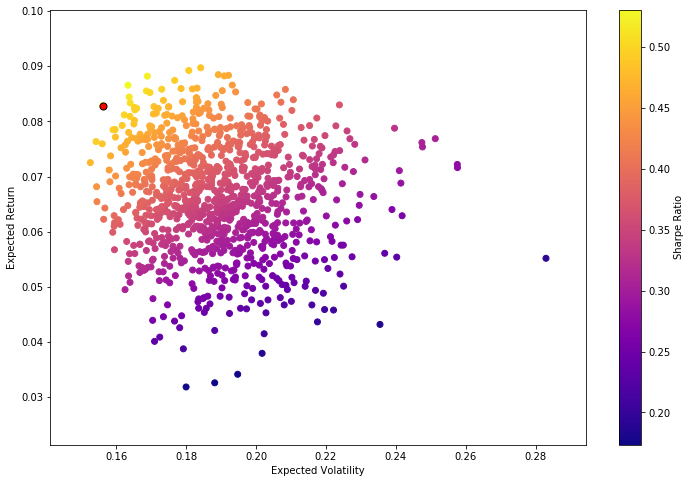

In [137]:
plt.figure(figsize=(12,8))
plt.scatter(porfolios['Volatility'], porfolios['Return'], c=sharpe,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return');

#Max Sharpe ratio
plt.scatter(porfolios.iloc[sharpe.argmax()][1],porfolios.iloc[sharpe.argmax()][0],c='red',s=50,edgecolors='black');

#### Another way, might be simplier

In [147]:
my_pfolio.tail()

,XOM,T,KO,JPM,BAC,PFE
Date,,,,,,
2020-05-19,43.939999,28.959999,44.540001,88.669998,22.209999,37.680000
2020-05-20,45.369999,29.590000,45.889999,91.330002,22.910000,37.630001
2020-05-21,44.560001,29.770000,45.169998,90.169998,22.900000,37.259998
2020-05-22,44.599998,29.879999,45.029999,89.470001,22.660000,37.500000
2020-05-26,45.910000,30.820000,46.090000,95.820000,24.280001,37.490002


In [149]:
mean_daily_ret = my_pfolio.pct_change(1).mean()
mean_daily_ret

XOM    0.000077
T      0.000323
KO     0.000392
JPM    0.000569
BAC    0.000458
PFE    0.000488
dtype: float64

This is NOT log return, it's simple return(better to compare at a specifi time)

In [150]:
my_pfolio.pct_change(1).corr()

,XOM,T,KO,JPM,BAC,PFE
XOM,1.000000,0.516353,0.510310,0.620407,0.560000,0.480237
T,0.516353,1.000000,0.528218,0.509870,0.455310,0.460997
KO,0.510310,0.528218,1.000000,0.469381,0.402141,0.479338
JPM,0.620407,0.509870,0.469381,1.000000,0.854662,0.503922
BAC,0.560000,0.455310,0.402141,0.854662,1.000000,0.458973
PFE,0.480237,0.460997,0.479338,0.503922,0.458973,1.000000


In [153]:
(my_pfolio/my_pfolio.shift(1) -1).corr()

,XOM,T,KO,JPM,BAC,PFE
XOM,1.000000,0.516353,0.510310,0.620407,0.560000,0.480237
T,0.516353,1.000000,0.528218,0.509870,0.455310,0.460997
KO,0.510310,0.528218,1.000000,0.469381,0.402141,0.479338
JPM,0.620407,0.509870,0.469381,1.000000,0.854662,0.503922
BAC,0.560000,0.455310,0.402141,0.854662,1.000000,0.458973
PFE,0.480237,0.460997,0.479338,0.503922,0.458973,1.000000


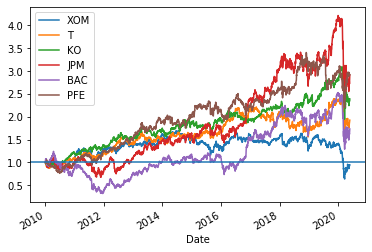

In [158]:
my_pfolio_normed = my_pfolio/my_pfolio.iloc[0]
my_pfolio_normed.plot()
plt.axhline(y=1);

In [161]:
my_pfolio_daily_ret = my_pfolio.pct_change(1)
my_pfolio_daily_ret.dropna(inplace=True)
my_pfolio_daily_ret.head()

,XOM,T,KO,JPM,BAC,PFE
Date,,,,,,
2010-01-05,0.003905,-0.004899,-0.012097,0.019370,0.032505,-0.014263
2010-01-06,0.008643,-0.014632,-0.000355,0.005494,0.011728,-0.003215
2010-01-07,-0.003142,-0.011228,-0.002485,0.019809,0.032947,-0.003763
2010-01-08,-0.004012,-0.007326,-0.018508,-0.002456,-0.008860,0.008094
2010-01-11,0.011220,-0.004798,0.020308,-0.003357,0.008939,0.008030


Now we use log return

In [166]:
my_portfolio_log_ret.head()

,XOM,T,KO,JPM,BAC,PFE
Date,,,,,,
2010-01-05,0.003897,-0.004911,-0.012171,0.019185,0.031988,-0.014365
2010-01-06,0.008606,-0.014741,-0.000355,0.005479,0.011660,-0.003221
2010-01-07,-0.003147,-0.011291,-0.002489,0.019615,0.032416,-0.003770
2010-01-08,-0.004020,-0.007353,-0.018682,-0.002459,-0.008900,0.008062
2010-01-11,0.011157,-0.004809,0.020105,-0.003363,0.008900,0.007998


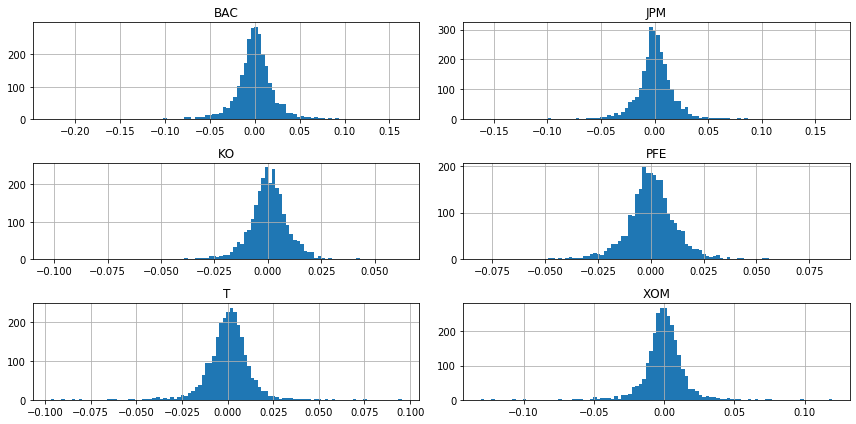

In [169]:
my_portfolio_log_ret.hist(bins=100,figsize=(12,6))
plt.tight_layout();

In [171]:
my_portfolio_log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
XOM,2615.0,-0.000020,0.013987,-0.130391,-0.006305,0.000000,0.006825,0.119442
T,2615.0,0.000250,0.012061,-0.096963,-0.005363,0.000803,0.006433,0.095513
KO,2615.0,0.000333,0.010875,-0.101728,-0.004510,0.000488,0.005624,0.062783
JPM,2615.0,0.000408,0.017910,-0.162106,-0.007458,0.000470,0.008803,0.165620
BAC,2615.0,0.000210,0.022288,-0.227129,-0.009948,0.000348,0.010687,0.163786
PFE,2615.0,0.000410,0.012497,-0.080501,-0.005813,0.000290,0.006712,0.085817


Annual log ret, 252 trading days in a year

In [172]:
my_portfolio_log_ret.mean()* 252

XOM   -0.005098
T      0.063081
KO     0.083925
JPM    0.102896
BAC    0.052989
PFE    0.103278
dtype: float64

In [176]:
my_portfolio_log_ret.cov() * 252

,XOM,T,KO,JPM,BAC,PFE
XOM,0.049298,0.022042,0.019648,0.039439,0.044283,0.021202
T,0.022042,0.036655,0.017483,0.027669,0.030843,0.017482
KO,0.019648,0.017483,0.029801,0.023140,0.024711,0.016430
JPM,0.039439,0.027669,0.023140,0.080832,0.085984,0.028403
BAC,0.044283,0.030843,0.024711,0.085984,0.125181,0.032229
PFE,0.021202,0.017482,0.016430,0.028403,0.032229,0.039354


Random Allocation

In [180]:
# Set seed (optional)
np.random.seed(101)

# Stock Columns
print('Stocks')
print(my_portfolio_log_ret.columns)
print('\n')

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(len(my_portfolio_log_ret.columns)))
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(my_portfolio_log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(my_portfolio_log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)


Stocks
Index(['XOM', 'T', 'KO', 'JPM', 'BAC', 'PFE'], dtype='object')


Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166 0.68527698 0.83389686]


Rebalance to sum to 1.0
[0.18401825 0.20335695 0.01014677 0.06112161 0.24419792 0.2971585 ]


Expected Portfolio Return
0.06266048035279302


Expected Volatility
0.1944258474314047


Sharpe Ratio
0.3222847228422149


We have to repeat this X(num_ports) times in order to find the weights relationship that will give the best stats to our porfolio

In [181]:
num_ports = 15000

all_weights = np.zeros((num_ports,len(my_portfolio_log_ret.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(len(my_portfolio_log_ret.columns)))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((my_portfolio_log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(my_portfolio_log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

Max sharpe ratio

In [182]:
sharpe_arr.max()

0.5679134603064466

Location of Max sharpe ratio

In [183]:
sharpe_arr.argmax()

2017

Distribution of the porfolio

In [204]:
# print(tickers)
all_weights[sharpe_arr.argmax(),:]

array([0.01434869, 0.06194396, 0.39059344, 0.09056902, 0.01469707,
       0.42784783])

A little more user friendly

In [215]:
for t in range(len(tickers)):
    print (tickers[t],'{}%'.format( round(all_weights[sharpe_arr.argmax(),:][t]*100,2 )))

XOM 1.43%
T 6.19%
KO 39.06%
JPM 9.06%
BAC 1.47%
PFE 42.78%


In [185]:
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]

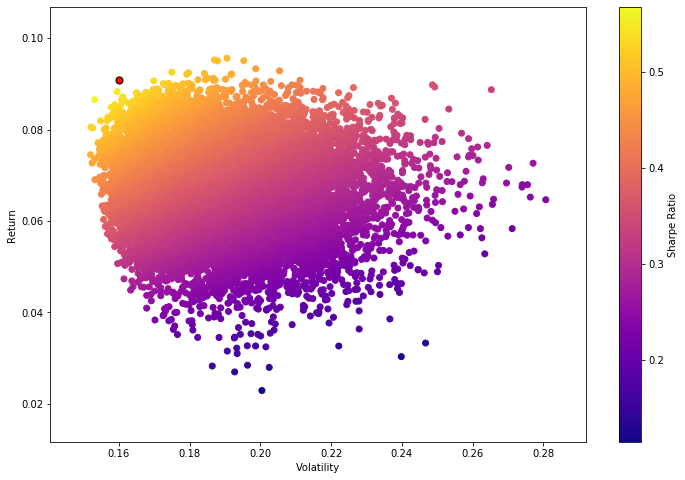

In [217]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black');

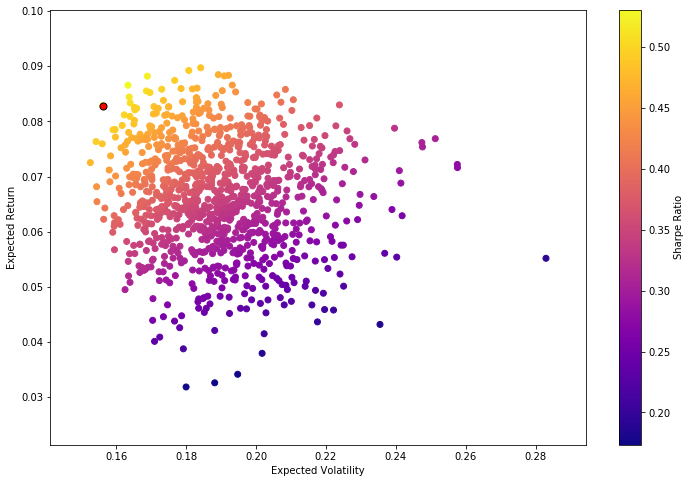

In [218]:
plt.figure(figsize=(12,8))
plt.scatter(porfolios['Volatility'], porfolios['Return'], c=sharpe,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return');

#Max Sharpe ratio
plt.scatter(porfolios.iloc[sharpe.argmax()][1],porfolios.iloc[sharpe.argmax()][0],c='red',s=50,edgecolors='black');

The main difference betweeen the two, is that in the first picture we repeated the operations 15k times, and in the fist one only 1k.

For me personally the second way (first picture) is easier

### Optimization

***Optimization, minimize***<br/>
Mathematical optimization deals with the problem of finding numerically minimums (or maximums or zeros) of a function. In this context, the function is called cost function, or objective function, or energy.
<br/>https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html
<br/>http://scipy-lectures.org/advanced/mathematical_optimization/


Quick and Easy examples:
<br/>https://www.youtube.com/watch?v=wS5D72wLez8
<br/>https://www.youtube.com/watch?v=cXHvC_FGx24 (I like this better)

In [462]:
from scipy.optimize import minimize

In [463]:
def get_ret_vol_sr(weights):
    """
    Takes in weights, returns array or return,volatility, sharpe ratio
    """
    weights = np.array(weights)
    ret = np.sum(my_portfolio_log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(my_portfolio_log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [464]:
weights

array([0.01424114, 0.08035603, 0.26908163, 0.0963085 , 0.19078744,
       0.34922526])

In [465]:
get_ret_vol_sr(weights)

array([0.08366586, 0.18047636, 0.46358348])

Now we understand the minimization concept, and the concept of ***sharpe ratio***(return/risk).

As we want to ***maximize*** the sharpe ratio, we just turn it negative so by minimizing the negative we maximize the positive.

Also the maximization can be done by changing the parameter sing to -1
<br/>https://stackoverflow.com/questions/43702352/maximize-optimization-using-scipy

In [447]:
def neg_sharpe(weights):
    """
    This is the part where the sharpe is returned negative.
    get_ret_vol_sr(weights), returns array of return[0],volatility[1], sharpe ratio[2]
    get_ret_vol_sr(weights)[2] = Sharpe ratio
    get_ret_vol_sr(weights)[2] * -1 = - Sharpe ratio
    """
    return  get_ret_vol_sr(weights)[2] * -1

***Constraints*** has to be passed to the minimize function to ***limit*** what it can and can't do

In [448]:
# Constraints
def check_sum(weights):
    '''
    Returns 0 if sum of weights is 1.0
    '''
    return np.sum(weights) - 1

Constraints are put in a dictionary, to be later fed to the minimize function.

- type : str
<br/>Constraint type: 'eq' for equality, 'ineq' for inequality.

- fun : callable (means we can put a function here[is way easier to define the function and then call it here])
<br/>The function defining the constraint.

In [449]:
# By convention of minimize function it should be a function that returns zero for conditions
cons = ({'type':'eq','fun': check_sum})

The bounds are the limit each of our values(weights) 

The limit each weight can have is 1, assuming the rest of the weights is 0. Remember that weights always has to sum 1.

In [453]:
# 0-1 bounds for each weight
bounds = ((0, 1), (0, 1), (0, 1), (0, 1),(0, 1),(0, 1))

Just an initial guess

In [466]:
# Initial Guess (equal distribution)
init_guess = [0.16,0.16,0.16,0.16,0.16,0.16]

The function minimize is run, it is fed with the parameters we defined previously

In [467]:
# Sequential Least SQuares Programming (SLSQP).
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [468]:
opt_results

     fun: -0.5872617444662613
     jac: array([ 5.15965611e-01,  1.52267665e-02, -4.41230834e-04,  9.28632915e-04,
        3.76410037e-01,  3.35961580e-04])
 message: 'Optimization terminated successfully.'
    nfev: 57
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([2.85076210e-15, 0.00000000e+00, 4.65650435e-01, 4.15557901e-02,
       2.39314689e-15, 4.92793775e-01])

Optimal weights

In [469]:
opt_results.x

array([2.85076210e-15, 0.00000000e+00, 4.65650435e-01, 4.15557901e-02,
       2.39314689e-15, 4.92793775e-01])

Optimal ret, vol and Sharpe

In [470]:
get_ret_vol_sr(opt_results.x)

array([0.09425053, 0.16049152, 0.58726174])

### Efficient Frontier (Optimal Porfolios)

The ***efficient frontier*** is the set of ***optimal portfolios*** that offer the ***highest expected return*** for a ***defined level of risk*** or the lowest risk for a given level of expected return. Portfolios that lie below the efficient frontier are sub-optimal because they do not provide enough return for the level of risk. Portfolios that cluster to the right of the efficient frontier are sub-optimal because they have a higher level of risk for the defined rate of return.

The ***standard deviation*** of a security is synonymous with ***risk***. ***Lower covariance*** between portfolio securities results in ***lower portfolio standard deviation***.


https://www.investopedia.com/terms/e/efficientfrontier.asp

In [484]:
# Our returns go from 0 to somewhere along 0.3
# Create a linspace number of points to calculate x on
frontier_y = np.linspace(0,0.09425053,100) # Change 100 to a lower number for slower computers!

In [485]:
def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1] 

In [486]:
frontier_volatility = []

for possible_return in frontier_y:
    # function for return
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

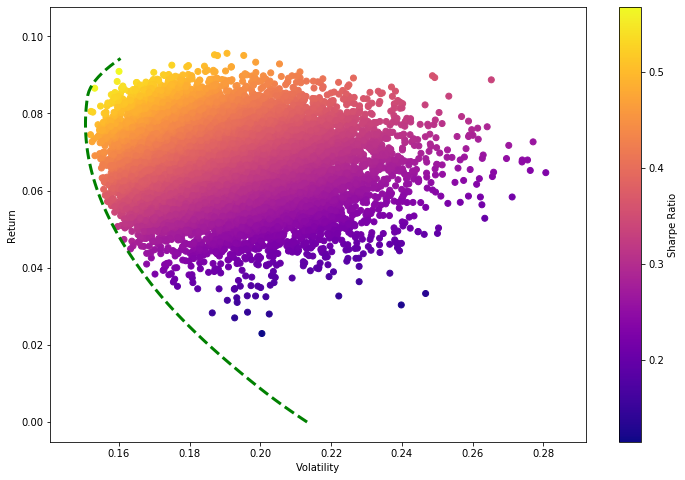

In [487]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')



# Add frontier line
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)